# 02807: Project 2
 
## Practical information
 
* This project must be completed in groups of 3 students.
* This project must be handed in as an *.ipynb notebook to the course site on DTU Inside. Go to the Assignments tab to upload your submission. 
* The notebook must be runnable on Google Colab.
* This project is due on Monday, November 30, 20:00.
* Each group has to hand in *one* notebook with their solutions.
* Your code must be written in Python/PySpark.
* For each question you may use as many cells for your solution as you like.
* You should not remove the problem statements.
* Your notebook should be runnable, i.e., clicking in the code cells should display the result that you want to have assessed.  
* You are not expected to use machine learning to solve any of the exercises.
 
## Colaboration policy
 
* It is not allowed to collaborate on the exercises with students outside your group, except for discussing the text of the exercise with teachers and fellow students enrolled on the course in the same semester. 
* It is not allowed to exchange, hand-over or in any other way communicate solutions or parts of solutions to the exercises. 
* It is not allowed to use solutions from similar courses, or solutions found elsewhere.

## Contribution table and grading

* The total amount of points in the project is 105.
* You have to indicate who has solved each part of each exercise in a **contribution table**. 
* The following is an example of a contribution table:

|        | Exercise 1 | Exercise 2 | Exercise 3 | Exercise 4 |
|--------|------------|------------|------------|------------|
| **Part 1** | John       |    Mary        |     Ann       |   Mary, Ann         |
| **Part 2** |     Mary       |    Mary        |   Ann         |    John, Ann        |
| **Part 3** |     John, Mary, Ann       |      John, Ann      |   John         | **n.a.**      |
| **Part 4** | **n.a.**       |  Ann          |     John, Mary       | **n.a.**       |
| **Part 5** | **n.a.**     | John, Mary, Ann           | **n.a.**       | **n.a.**       |
| **Part 6** | **n.a.**       | John, Mary, Ann           | **n.a.**      | **n.a.**      |

* A group member can take credit for solving a part of an exercise only if they have contributed **substantially** to the solution. 
* Simple contributions, such as correcting a small bug or double-checking the results of functions, are not sufficient for taking credit for a solution.
* Several group members can take credit for the same solution if they all have contributed substantially to it.
* **Each group member must solve at least 105/3=35 points**. 
* **If no name is provided for an exercise's part, all group members will be assigned responsibility for it**.
* Group members should decide amongst themselves how to collaborate on the project to meet the above-mentioned constraints.  
* Grades are individual. The grade $\text{grade}(m)$ for a group member $m$ ranges from 0 to 10 and is calculated as follows: 

  * $\text{individual-score}(m) = \frac{\text{total number of points for the parts correctly solved by }m}{\text{total number of points for the parts contributed by }m}$

  * $\text{group-score} = \frac{\text{total number of points correctly solved by any group member}}{\text{total number of points in the project}}$

  * $\text{grade}(m) =  7.5 \cdot \text{individual-score}(m) + 2.5 \cdot \text{group-score}$

* **Example**: in the contribution table above, suppose that all parts are solved correctly except for those of Exercise 4, which are both wrong. Then Ann's grade is calculated as follows:

  * $\text{individual-part}(Ann) = \frac{2.5 + 2.5 + 10 + 10 + 5 + 10 + 5}{2.5 + 2.5 + 10 + 10 + 5 + 10 + 5 + 10 + 10} = \frac{45}{65} = 0.692$

  * $\text{group-part} = \frac{85}{105} = 0.809$

  * $\text{grade}(Ann) =  7.14$


# Guidelines
- Data processing should be done using PySpark. Once data has been reduced to aggregate form, you may use collect to extract it into Python for visualisation.
- Your solutions will be evaluated by correctness, code quality and interpretability of the output. This means that you have to write clean and efficient Spark code that will generate sensible execution plans, and that the tables and visualisations that you produce are meaningful and easy to read.
- You may add more cells for your solutions, but you should not modify the notebook otherwise.

#<font color='red'>Additional Guidelines (added 4-Nov)</font>

- You have to submit an *.ipynb file that runs on Google Colab. You may work on any other platform to develop your solutions, but you must make sure that the final form of the notebook is runnable on Colab. 

- Do not clear output cells when submitting the *.ipynb file, so we can see the results of your code cell executions without necessarily running them.

- To work with the 2 large files in Project 2, we suggest that you do the following:

1.   Create a new google account dedicated exclusively to Project 2.
2.   Use the free 15 GB of Google Drive storage provided with the account to store listings.csv and reviews.csv (if necessary, zip the files first).
3. Mount your Google Drive in the runtime's virtual machine. This will allow you to access the data from your Google Drive. Here is an official guide to mounting Drive on Colab: https://colab.research.google.com/notebooks/io.ipynb#scrollTo=p2E4EKhCWEC5
4. Now, the two files are available in the `/content/drive folder of your runtime's virtual machine. 

* You are allowed to use a different way of storing/reading the two large files, but make sure to do so in a way in which we can easily run your notebook.









# Group declaration table 

This table must be filled before submission.



In [1]:
import pandas as pd

d = {'Exercise 1' : ["Guangya", "Guangya", "Guangya", "Guangya", "Guangya", "Guangya", "Guangya", "Guangya", "Guangya"], 
     'Exercise 2' : ["Manxi", "Manxi", "Manxi", "Manxi", "Manxi", "Manxi", "Manxi", "Manxi", "Manxi"],
     } 
  
ct = pd.DataFrame(d, index =['Part 1','Part 2.1','Part 2.2','Part 2.3','Part 2.4','Part 2.5','Part 2.6','Part 3.1','Part 3.2']) 

ct

Exercise 1 Exercise 2
Part 1      Guangya      Manxi
Part 2.1    Guangya      Manxi
Part 2.2    Guangya      Manxi
Part 2.3    Guangya      Manxi
Part 2.4    Guangya      Manxi
Part 2.5    Guangya      Manxi
Part 2.6    Guangya      Manxi
Part 3.1    Guangya      Manxi
Part 3.2    Guangya      Manxi

# Create Spark session and define imports

In [95]:
# importation
!pip install pandasql
import pandasql as psql 

import numpy as np
import os
import pandas as pd
import sys
from copy import copy
from collections import Counter
import re
import seaborn as sns
from matplotlib import pyplot as plt
import pickle

import pyspark
from pyspark.sql import *
from pyspark.sql import functions as f
from pyspark.sql.types import *
from pyspark import SparkContext, SparkConf

In [2]:
# Create Spark session 
conf = SparkConf().set("spark.ui.port", "4050")
sc = pyspark.SparkContext(conf=conf)
spark = SparkSession.builder.getOrCreate()

In [3]:
spark

# Exercise 1: Airbnb analysis (52.5 points)


## Introduction

<img src="https://www.esquireme.com/public/images/2019/11/03/airbnb-678x381.jpg" alt="airbnb" width="600"/>

[Airbnb](http://airbnb.com) is an online marketplace for arranging or offering lodgings. In this exercise you will use Spark to analyze data obtained from the Airbnb website. The purpose of the analysis is to extract information about trends and patterns from the data.

The project has two parts.

### Part 1: Loading, describing and preparing the data
There's quite a lot of data. Make sure that you can load and correctly parse the data, and that you understand what the dataset contains. You should also prepare the data for the analysis in part two.

### Par 2: Analysis
In this part your goal is to learn about trends and usage patterns from the data. You should give solutions to the tasks defined in this notebook, and you should use Spark to do the data processing. You may use other libraries like for instance Pandas and matplotlib for visualisation.


## Part 1: Loading, describing and preparing the data (2.5 pts)
The data comes in two files. Start by downloading the files.

- [Listings](https://files.dtu.dk/u/lT8jJJs_IyiHPyMs/listings.csv?l) (5 GB)
- [Reviews](https://files.dtu.dk/u/yH8FBcZ_BQjafwUN/reviews.csv?l) (9.5 GB)

### Load the data
The data has multiline rows (rows that span multiple lines in the file). To correctly parse these you should use the `multiLine` option and set the `escape` character to be `"`.

In [97]:
#load the data
listing_data = spark.read.option("multiLine", True).option("header", True).option("escape", '"').csv("./listings_100k.csv")
review_data = spark.read.option("multiLine", True).option("header", True).option('inferSchema', True).option("escape", '"').csv("./reviews_100k.csv")

### Describe the data
List the features (schema) and sizes of the datasets.

In [100]:
# We simply used the sampled data
# schema of listing_data
listing_data.printSchema()

root
 |-- id: string (nullable = true)
 |-- listing_url: string (nullable = true)
 |-- scrape_id: string (nullable = true)
 |-- last_scraped: string (nullable = true)
 |-- name: string (nullable = true)
 |-- summary: string (nullable = true)
 |-- space: string (nullable = true)
 |-- description: string (nullable = true)
 |-- experiences_offered: string (nullable = true)
 |-- neighborhood_overview: string (nullable = true)
 |-- notes: string (nullable = true)
 |-- transit: string (nullable = true)
 |-- access: string (nullable = true)
 |-- interaction: string (nullable = true)
 |-- house_rules: string (nullable = true)
 |-- thumbnail_url: string (nullable = true)
 |-- medium_url: string (nullable = true)
 |-- picture_url: string (nullable = true)
 |-- xl_picture_url: string (nullable = true)
 |-- host_id: string (nullable = true)
 |-- host_url: string (nullable = true)
 |-- host_name: string (nullable = true)
 |-- host_since: string (nullable = true)
 |-- host_location: string (nullable

In [99]:
# sizes of the datasets
listing_data.count()

100000

In [101]:
# We simply used the sampled data
# schema of review_data
review_data.printSchema()

root
 |-- listing_id: integer (nullable = true)
 |-- id: integer (nullable = true)
 |-- date: string (nullable = true)
 |-- reviewer_id: integer (nullable = true)
 |-- reviewer_name: string (nullable = true)
 |-- comments: string (nullable = true)



In [102]:
# sizes of the datasets
review_data.count()

100000

### Prepare the data for analysis
You should prepare two dataframes to be used in the analysis part of the project. You should not be concerned with cleaning the data. There's a lot of it, so it will be sufficient to drop rows that have bad values. You may want to go back and refine this step at a later point when doing the analysis.


In [104]:
#define a function to clean the Null price, and convert price to number
def price_clean(price):
    try:
        num = ''.join(price.split(','))
        num = eval(num[1:])
    except:
        num = np.nan
    return num

price_clean_udf = f.udf(price_clean,FloatType())

# clean the data for our need
cleaned_listing = listing_data.withColumn('price_num',price_clean_udf(f.col('price')))
cleaned_listing = cleaned_listing.filter(f.col('price_num').isNotNull()).filter(f.col('neighbourhood').isNotNull()).filter(f.col('review_scores_rating').isNotNull()).filter(f.col('name').isNotNull())
cleaned_listing.cache()

DataFrame[id: string, listing_url: string, scrape_id: string, last_scraped: string, name: string, summary: string, space: string, description: string, experiences_offered: string, neighborhood_overview: string, notes: string, transit: string, access: string, interaction: string, house_rules: string, thumbnail_url: string, medium_url: string, picture_url: string, xl_picture_url: string, host_id: string, host_url: string, host_name: string, host_since: string, host_location: string, host_about: string, host_response_time: string, host_response_rate: string, host_acceptance_rate: string, host_is_superhost: string, host_thumbnail_url: string, host_picture_url: string, host_neighbourhood: string, host_listings_count: string, host_total_listings_count: string, host_verifications: string, host_has_profile_pic: string, host_identity_verified: string, street: string, neighbourhood: string, neighbourhood_cleansed: string, neighbourhood_group_cleansed: string, city: string, state: string, zipcode

In [105]:
cleaned_review = review_data.filter(f.col('listing_id').isNotNull()).filter(f.col('date').isNotNull()).filter(f.col('id').isNotNull())
cleaned_review.cache()

DataFrame[listing_id: int, id: int, date: string, reviewer_id: int, reviewer_name: string, comments: string]

## Part 2: Analysing the data (50 pts)
Use Spark and your favorite tool for data visualization to solve the following tasks. Imagine that you are talking to your colleagues or your new boss. Think about how you present the data. Include headers, legends and well-written descriptions for graphs/charts. Think of the solutions you provide as an "executive summary" of your findings. You should put an effort in presentation and writing, not just coding.


### 2.1: The basics (10 pts)
Compute and visualise a dataframe with the number of listings and neighbourhoods per city.

In [106]:
#display the frame with listings and neighbourhoods
cleaned_listing.select("city","listing_url","neighbourhood").show(20)

+---------------+--------------------+--------------------+
|           city|         listing_url|       neighbourhood|
+---------------+--------------------+--------------------+
|      Stockholm|https://www.airbn...|           Södermalm|
|      Stockholm|https://www.airbn...|         Kungsholmen|
|      Stockholm|https://www.airbn...|           Södermalm|
|      Stockholm|https://www.airbn...|           Skarpnäck|
|      Stockholm|https://www.airbn...|            Norrmalm|
|      Stockholm|https://www.airbn...|         Kungsholmen|
|      Stockholm|https://www.airbn...|Hägersten-Liljeho...|
|Skarpnäcks gård|https://www.airbn...|           Skarpnäck|
|      Stockholm|https://www.airbn...|            Norrmalm|
|      Stockholm|https://www.airbn...|            Norrmalm|
|      Stockholm|https://www.airbn...|           Södermalm|
|        Bredäng|https://www.airbn...|          Skärholmen|
|      Stockholm|https://www.airbn...|           Östermalm|
|      Stockholm|https://www.airbn...|  

In [107]:
# for each city, display the number of listings and neighbourhoods 
city_listingneib = cleaned_listing.groupBy("city").agg(f.count("listing_url").alias("number(listings)"),f.count("neighbourhood").alias("number(neighbourhood)"))
city_listingneib.toPandas().head()

city  number(listings)  number(neighbourhood)
0                   LYON 02                 1                      1
1  Paris-15E-Arrondissement                16                     16
2                     75007                 1                      1
3                   beyazıd                 1                      1
4                   Frogner                44                     44

Based on the table above, you should choose a city that you want to continue your analysis for. The city should have mulitple neighbourhoods with listings in them.

Compute and visualize the number of listings of different property types per neighbourhood in your city.

In [108]:
# we choose Stockholm as our city, then we get the number of listings of different property types per neighbourhood 
Stockholm_data = cleaned_listing.filter(f.col('city') == 'Stockholm')
Stockholm_data1 = Stockholm_data.select("neighbourhood","property_type","listing_url").groupBy(["neighbourhood","property_type"]).agg(f.count("listing_url").alias("number(listings)")).orderBy('neighbourhood')

Stockholm_data1.toPandas().head(20)

neighbourhood       property_type  number(listings)
0                  Bromma           Townhouse                 2
1                  Bromma                Loft                 1
2                  Bromma               House                13
3                  Bromma           Apartment                17
4                  Bromma          Aparthotel                 1
5                  Bromma  Serviced apartment                 1
6    Enskede-Årsta-Vantör               House                10
7    Enskede-Årsta-Vantör               Villa                 3
8    Enskede-Årsta-Vantör          Guesthouse                 1
9    Enskede-Årsta-Vantör           Apartment                51
10                 Farsta               House                 6
11                 Farsta               Villa                 2
12                 Farsta           Townhouse                 1
13                 Farsta           Apartment                10
14  Hägersten-Liljeholmen              Hostel                 1
15  Hägersten-Liljeholmen               House                 6
16  Hägersten-Liljeholmen               Villa                 1
17  Hägersten-Liljeholmen                Loft                 1
18  Hägersten-Liljeholmen         Condominium                 2
19  Hägersten-Liljeholmen                Boat                 2

### 2.2. Prices (10 pts)
Compute the minimum, maximum and average listing price in your city.

In [111]:
Stockholm_price = Stockholm_data.select('price_num')

In [112]:
# The minimum listing price is $98, maximum is $10155 and average is $1089.8
Stockholm_data.describe(['price_num']).show()

+-------+------------------+
|summary|         price_num|
+-------+------------------+
|  count|               851|
|   mean|1117.3830787309048|
| stddev| 825.9826996595407|
|    min|             147.0|
|    max|           10155.0|
+-------+------------------+



Compute and visualise the distribution of listing prices in your city. Write a paragraph describing your findings.

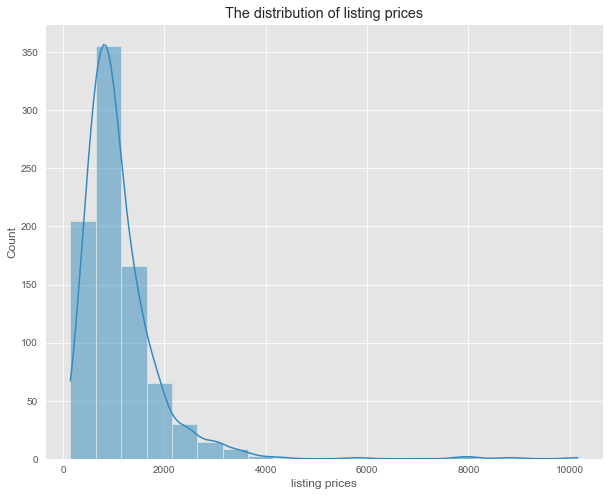

In [123]:
# The distribution of listing prices in Stockholm 
plt.style.use('ggplot')
data = Stockholm_price.select("price_num").rdd.flatMap(lambda x: x).collect()
plt.figure(figsize=(10, 8))
plt.title('The distribution of listing prices')
plt.xlabel('listing prices')
sns.histplot(data, bins=20, kde=True)
plt.show()

`Findings`: 

We can find that the most listing prices in Stockholm are cheaper than 4000. Most listing prices are between 500 and 1000.  

The value of a listing is its rating divided by its price. Compute and show a dataframe with the 3 highest valued listings in each neighbourhood.

In [124]:
# See neighbourhood
cleaned_listing.select("neighbourhood").show()

+--------------------+
|       neighbourhood|
+--------------------+
|           Södermalm|
|         Kungsholmen|
|           Södermalm|
|           Skarpnäck|
|            Norrmalm|
|         Kungsholmen|
|Hägersten-Liljeho...|
|           Skarpnäck|
|            Norrmalm|
|            Norrmalm|
|           Södermalm|
|          Skärholmen|
|           Östermalm|
|            Norrmalm|
|Hägersten-Liljeho...|
|         Kungsholmen|
|         Kungsholmen|
|              Älvsjö|
|           Södermalm|
|           Södermalm|
+--------------------+
only showing top 20 rows



In [117]:
# See review_scores_rating
cleaned_listing.select("review_scores_rating").show()

+--------------------+
|review_scores_rating|
+--------------------+
|                  94|
|                  93|
|                  92|
|                  93|
|                  96|
|                  97|
|                  96|
|                  89|
|                  95|
|                  97|
|                 100|
|                  91|
|                  93|
|                  95|
|                  98|
|                  98|
|                  94|
|                  96|
|                 100|
|                 100|
+--------------------+
only showing top 20 rows



In [149]:
# let's compute the value
value = Stockholm_data.withColumn('value',f.col("review_scores_rating")/f.col('price_num')).select('neighbourhood','name','value')
value.show()

+--------------------+--------------------+--------------------+
|       neighbourhood|                name|               value|
+--------------------+--------------------+--------------------+
|           Södermalm|Hornstull with wa...|0.029292614521657837|
|         Kungsholmen|One room in appar...| 0.15577889447236182|
|           Södermalm|Cosy apartment ce...| 0.08318264014466546|
|           Skarpnäck|Big Private Bedro...| 0.09597523219814241|
|            Norrmalm|City Apartment - ...| 0.07378939277478862|
|         Kungsholmen|Junior 1 bedroom ...| 0.05832832230907998|
|Hägersten-Liljeho...|Bright & cosy hom...| 0.23940149625935161|
|            Norrmalm|Studio in the cen...| 0.11033681765389082|
|            Norrmalm|Exclusive apartme...|  0.0708029197080292|
|           Södermalm|Lovely stay in St...| 0.12468827930174564|
|           Östermalm|Single room-city ...| 0.12845303867403315|
|            Norrmalm|Super centric att...| 0.06790564689063616|
|Hägersten-Liljeho...|Cha

In [150]:
value = value.filter(f.col('value').isNotNull())
value = value.select('neighbourhood','name','value').orderBy(['neighbourhood','value'],ascending = False)

value_pd = value.toPandas()
value_pd = value_pd.groupby(['neighbourhood','name'])
value_pd.head()

neighbourhood                                              name     value
0       Östermalm        Room close to city center and green areas!  0.292398
1       Östermalm                       Modern studio close to city  0.255754
2       Östermalm                    Cozy single room in a corridor  0.240240
3       Östermalm    Lovely family room  6 min from central station  0.208768
4       Östermalm                     Royal Hunting Area Hjorthagen  0.194389
..            ...                                               ...       ...
846        Bromma     Red cottage by lake Mälaren, Bromma Stockholm  0.051361
847        Bromma                               Beautiful apartment  0.050580
848        Bromma  Lovely house close to the city, nature and beach  0.041333
849        Bromma               Welcome to our 1920 house in Bromma  0.034530
850        Bromma            Christmas in Stockholm with the works!  0.011357

[851 rows x 3 columns]

In [151]:
value.registerTempTable("value")

q = '''
select a.neighbourhood as neighbourhood,a.value as value
from
(
select neighbourhood, value, row_number() over(partition by neighbourhood order by value desc) as n
from value
)a
where a.n<=3; 
'''

value = spark.sql(q)
value.show()

+--------------------+-------------------+
|       neighbourhood|              value|
+--------------------+-------------------+
|Enskede-Årsta-Vantör|0.33003300330033003|
|Enskede-Årsta-Vantör| 0.3069306930693069|
|Enskede-Årsta-Vantör|  0.291970802919708|
|         Kungsholmen|0.36742424242424243|
|         Kungsholmen|0.33003300330033003|
|         Kungsholmen|0.22802850356294538|
|       Rinkeby-Kista| 0.5102040816326531|
|       Rinkeby-Kista|0.30670926517571884|
|       Rinkeby-Kista|0.23940149625935161|
|           Skarpnäck| 0.2840909090909091|
|           Skarpnäck|0.24688279301745636|
|           Skarpnäck|0.24189526184538654|
|            Norrmalm| 0.2375296912114014|
|            Norrmalm| 0.2222222222222222|
|            Norrmalm|0.20040080160320642|
|       Spånga-Tensta| 0.4744897959183674|
|       Spånga-Tensta|0.45408163265306123|
|       Spånga-Tensta| 0.4336734693877551|
|Hägersten-Liljeho...|0.36742424242424243|
|Hägersten-Liljeho...|0.36220472440944884|
+----------

### 2.3. Trends (10 pts)
Now we want to analyze the "popularity" of your city. The data does not contain the number of bookings per listing, but we have a large number of reviews, and we will assume that this is a good indicator of activity on listings.

Compute and visualize the popularity (i.e., number of reviews) of your city over time. Can you identify any trends? Write a paragraph describing your findings.

In [132]:
Stockholm_data_pd = Stockholm_data.toPandas()
cleaned_review = cleaned_review.withColumn('review_id',f.col('id'))
cleaned_review = cleaned_review.drop('id')
cleaned_review_pd = cleaned_review.toPandas()

In [133]:
cleaned_review_pd['listing_id']=cleaned_review_pd.listing_id.astype(str)
q = """
  SELECT
    cleaned_review_pd.listing_id, cleaned_review_pd.date, cleaned_review_pd.review_id
  FROM
    cleaned_review_pd
  INNER JOIN
    cleaned_listing_pd
  on
    cleaned_listing_pd.id = cleaned_review_pd.listing_id
    """
psql.sqldf(q)

PandaSQLException: (sqlite3.OperationalError) no such table: cleaned_listing_pd
[SQL: 
  SELECT
    cleaned_review_pd.listing_id, cleaned_review_pd.date, cleaned_review_pd.review_id
  FROM
    cleaned_review_pd
  INNER JOIN
    cleaned_listing_pd
  on
    cleaned_listing_pd.id = cleaned_review_pd.listing_id
    ]
(Background on this error at: http://sqlalche.me/e/13/e3q8)

In [ ]:
combin = Stockholm_data.join(cleaned_review, Stockholm_data.id==cleaned_review.listing_id, "inner")

In [ ]:
combin.groupBy('date').agg(f.count('date')).toPandas()

In [ ]:
from datetime import datetime

import matplotlib.dates as mdates
import matplotlib.pyplot as plt

In [ ]:
def clean_date(d):
    if int(d[0:4])<2021 and int(d[0:4])>1000:
        if int(d[5:7])<13 and int(d[5:7])>0:
            if int(d[8:10])<32 and int(d[8:10])>0:
                if len(d)==10:
                    return d
                else:
                    return np.nan
            else:
                return np.nan
        else:
            return np.nan
    else:
        return np.nan
    

combin_cleaned = combin.withColumn('date',f.udf(clean_date)('date'))
combin_cleaned = combin_cleaned.filter(f.col('date').isNotNull())

In [ ]:
combin_pd = combin_cleaned.groupBy('date').agg(f.count('date')).toPandas()

In [ ]:
combin_pd[combin_pd['date']==0]

In [ ]:
xs = combin_pd['date']
ys = combin_pd['count(date)']
plt.plot(xs, ys,linestyle='-')

fig = plt.figure(figsize=(20, 5))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Plot
xlocator = mpl.ticker.MultipleLocator(90)
plt.gca().xaxis.set_major_locator(xlocator)

plt.show()

Compute and visualize the popularity of neighbourhoods over time. If there are many neighbourhoods in your city, you should select a few interesting ones for comparison. Can you identify any trends or differences? Summarise your findings.

In [ ]:
combin.groupBy(['neighbourhood','date']).agg(f.count('date')).toPandas()

Compute and visualize the popularity of your city by season. For example, visualize the popularity of your city per month. Are there seasonal trends? Describe your findings in words.

### 2.4. Reviews (20 pts)
In this part you should determine which words used in reviews are the most positive. More specifically, you should assign a "positivity score" to each word seen in reviews and list the words with the highest score. 

The individual reviews do not have a rating of the listing, so we will assume that each review gave the average rating to the listing, i.e., the one on the listing.

It is up to you to decide what the score should be. For example, it could be a function of the rating on the listing on which it occurs, the number of reviews it occurs in, and the number of unique listings for which it was used. 

Your positivity scores should be sensible. Words such as "clean", "comfortable", "superhost", etc., should get high scores, while words such as "unpleasant", "dirty", "scam" should get low scores.

Depending on your choice of scoring function, you may also want to do some filtering of words. For example, remove words that only occur in a few reviews. 

You have to: 

* Define your scoring function, mathematically and in code, and describe it in words.
* Compute scores for all words.
* List the 10 words with highest and lowest score.

# Exercise 2: sales & profit analysis (52.5 points)


## Introduction


<img src="https://www.lifeandstylemag.com/wp-content/uploads/2018/01/kevin-malone-the-office.jpg?resize=630%2C354" alt="kevin" width="600"/> 

*Kevin from accounting*



Your team has been hired by the company X as data scientists. X makes gadgets for a wide range of industrial and commercial clients.

As in-house data scientists, your teams first task, as per request from your new boss, is to optimize business operations. You have decided that a good first step would be to analyze the company's historical sales data to gain a better understanding of where profit is coming from. It may also reveal some low hanging fruit in terms of business opportunities.

To get started, you have called the IT department to get access to the customer and sales transactions database. To your horror you've been told that such a database doesn't exist, and the only record of sales transactions is kept by Kevin from accounting in an Excel spreadsheet. So you've emailed Kevin asking for a CSV dump of the spreadsheet...

In this project you need to clean the data you got from Kevin, enrich it with further data, prepare a database for the data, and do some data analysis. The project is comprised of five parts. They are intended to be solved in the order they appear, but it is highly recommended that you read through all of them and devise an overall strategy before you start implementing anything.


## Part 1: Cleaning the data (10 pts)
Kevin has emailed you the following link to the CSV dump you requested.

- [transactions.csv](http://courses.compute.dtu.dk/02807/2020/projects/project2/transactions.csv)

It seems as though he has been a bit sloppy when keeping the records. 

In this part you should:
1. Explain what the data is about
2. Inspect and clean it to prepare it for analysis. Describe the problems you found in the data, and how you addressed them.

In [4]:
# read transactions.csv
df = spark.read.option('header', True).option('inferSchema', True).csv('./transactions.csv')

In [5]:
# show basic information
df.printSchema()
df.show(5)
df.count()

root
 |-- part: string (nullable = true)
 |-- company: string (nullable = true)
 |-- country: string (nullable = true)
 |-- city: string (nullable = true)
 |-- price: string (nullable = true)
 |-- date: string (nullable = true)

+----------+-------------+-------+------------+--------+-------------------+
|      part|      company|country|        city|   price|               date|
+----------+-------------+-------+------------+--------+-------------------+
|54868-5165|Chatterbridge|  Spain|   Barcelona| 784.79€|2016-01-02 00:01:05|
|60505-2867|         Lajo| Greece|Thessaloniki| 187.99€|2016-01-02 00:05:26|
| 24385-268|    Flipstorm| Greece|      Athens| 221.73€|2016-01-02 00:18:30|
| 76117-001|  Twitterbeat| France|      Annecy|1075.82€|2016-01-02 02:32:30|
|44946-1046|Chatterbridge|  Spain|   Barcelona| 412.55€|2016-01-02 04:51:55|
+----------+-------------+-------+------------+--------+-------------------+
only showing top 5 rows



20568

In [6]:
# inspect data
## part
df.select('part').distinct().show(5)

+---------+
|     part|
+---------+
|98132-889|
|76314-002|
|52125-444|
|55700-014|
|49738-105|
+---------+
only showing top 5 rows



In [7]:
## company
## those with few number of transactions need to be cleaned
df.groupBy('company').agg(f.count('company').alias("Number of transactions")).orderBy(f.desc("Number of transactions")).show(40)

+-------------+----------------------+
|      company|Number of transactions|
+-------------+----------------------+
|   Thoughtmix|                  2795|
|  Twitterbeat|                  2268|
|        Zooxo|                  1670|
|Chatterbridge|                  1589|
|  Shufflebeat|                  1553|
|        Ntags|                  1514|
|     Buzzbean|                  1254|
|  Brainsphere|                  1242|
|    Flipstorm|                  1193|
|      Wordify|                   968|
|        Yozio|                   655|
|       Roodel|                   627|
|       Eimbee|                   498|
|      Zoonder|                   454|
|      Teklist|                   428|
|      Gabcube|                   357|
|        Voomm|                   250|
|         Lajo|                   220|
|       Avaveo|                   212|
|      Rhycero|                   204|
|    Realpoint|                   158|
|     Riffpath|                   151|
|     Kanoodle|          

In [8]:
## country
df.groupBy('country').agg(f.count('country').alias("Number of transactions")).orderBy(f.desc("Number of transactions")).show(40)

+--------------+----------------------+
|       country|Number of transactions|
+--------------+----------------------+
|      Portugal|                  7383|
|        France|                  3463|
|        Greece|                  1630|
|United Kingdom|                  1511|
|         Spain|                  1425|
| United States|                  1256|
|       Germany|                  1125|
|   Netherlands|                   427|
|         Japan|                   159|
|   Switzerland|                    11|
|       Portuga|                     5|
|            US|                     1|
|      Tyskland|                     1|
|          null|                     0|
+--------------+----------------------+



In [9]:
## city
df.groupBy('city').agg(f.count('city').alias("Number of transactions")).orderBy(f.desc("Number of transactions")).show(40)

+------------+----------------------+
|        city|Number of transactions|
+------------+----------------------+
|    Amadora	|                  2787|
|      Annecy|                  2267|
|      London|                  1669|
|      Lisbon|                  1667|
|   Barcelona|                  1589|
|       Porto|                  1550|
|  Düsseldorf|                  1254|
|       Braga|                  1237|
|    New York|                   968|
|      Athens|                   812|
|      Patras|                   653|
|     Aranhas|                   627|
|      Amiens|                   498|
|      Boston|                   454|
|      Arnhem|                   426|
|    Nanterre|                   381|
|      Almada|                   357|
|       Paris|                   250|
|Thessaloniki|                   221|
|        Nice|                   212|
|     Arcueil|                   204|
|   Heraklion|                   151|
|     Niihama|                   126|
|       Asak

In [10]:
## price
df.select('price').distinct().show(5)

+-------+
|  price|
+-------+
|978.12€|
|104.51€|
|732.98€|
| 710.4€|
|486.53€|
+-------+
only showing top 5 rows



In [11]:
## date
df.select('date').distinct().show(5)

+-------------------+
|               date|
+-------------------+
|2016-01-13 19:29:47|
|2016-01-16 02:43:15|
|2016-01-17 16:35:36|
|2016-01-23 12:41:14|
|2016-01-24 20:31:48|
+-------------------+
only showing top 5 rows



In [12]:
# handle price
# remove meanlingless words
df = df.filter("price != '-' and price != 'na'")
df.count()

# remove meaningless prices
def cleanPrice(x):
    character = re.findall(r'[^0-9^\.^-]', x)
    if 1 != len(character):
        return "na"
    x = re.sub('[^0-9\.\-]', '', x) 
    return character[0] + str(np.abs(eval(x)))

foo = f.udf(cleanPrice, StringType())
df = df.withColumn('price', foo(df.price))
df.show(5)

+----------+-------------+-------+------------+--------+-------------------+
|      part|      company|country|        city|   price|               date|
+----------+-------------+-------+------------+--------+-------------------+
|54868-5165|Chatterbridge|  Spain|   Barcelona| €784.79|2016-01-02 00:01:05|
|60505-2867|         Lajo| Greece|Thessaloniki| €187.99|2016-01-02 00:05:26|
| 24385-268|    Flipstorm| Greece|      Athens| €221.73|2016-01-02 00:18:30|
| 76117-001|  Twitterbeat| France|      Annecy|€1075.82|2016-01-02 02:32:30|
|44946-1046|Chatterbridge|  Spain|   Barcelona| €412.55|2016-01-02 04:51:55|
+----------+-------------+-------+------------+--------+-------------------+
only showing top 5 rows



20553

In [13]:
# Date: from string to integer
#df = df.withColumn('date', f.to_timestamp(df.date, 'yyyy-MM-dd HH:mm:ss'))
df = df.withColumn('year', f.year(df.date))
df = df.withColumn('quarter', f.quarter(df.date))
df = df.drop('date')
df.printSchema()
df.show(5)
df = df.filter("year != 2019")
df.groupBy('year').agg(f.count('year').alias("Number of transactions")).orderBy(f.desc("Number of transactions")).show(40)
df.groupBy('quarter').agg(f.count('quarter').alias("Number of transactions")).orderBy(f.desc("Number of transactions")).show(40)
df.count()

root
 |-- part: string (nullable = true)
 |-- company: string (nullable = true)
 |-- country: string (nullable = true)
 |-- city: string (nullable = true)
 |-- price: string (nullable = true)
 |-- year: integer (nullable = true)
 |-- quarter: integer (nullable = true)

+----------+-------------+-------+------------+--------+----+-------+
|      part|      company|country|        city|   price|year|quarter|
+----------+-------------+-------+------------+--------+----+-------+
|54868-5165|Chatterbridge|  Spain|   Barcelona| €784.79|2016|      1|
|60505-2867|         Lajo| Greece|Thessaloniki| €187.99|2016|      1|
| 24385-268|    Flipstorm| Greece|      Athens| €221.73|2016|      1|
| 76117-001|  Twitterbeat| France|      Annecy|€1075.82|2016|      1|
|44946-1046|Chatterbridge|  Spain|   Barcelona| €412.55|2016|      1|
+----------+-------------+-------+------------+--------+----+-------+
only showing top 5 rows

+----+----------------------+
|year|Number of transactions|
+----+---------

20542

In [14]:
# handle company names
def rename(x):
    if 'Zooxo.' == x:
        return x[:-1]
    if 'Ntagz' == x:
        return 'Ntags'
    if 'Thoughtmixz' == x:
        return x[:-1]
    if 'Laj0' == x:
        return 'Lajo'
    if ' a' == x:
        return 'Wordify'
    if 'aa' == x:
        return 'Wordify'
    if ' -' == x:
        return 'Zoonder'
    else:
        return x
    
foo = f.udf(rename, StringType())
df = df.withColumn('company', foo(df.company))
df.groupBy('company').agg(f.count('company').alias("Number of transactions")).orderBy(f.desc("Number of transactions")).show(40)

+-------------+----------------------+
|      company|Number of transactions|
+-------------+----------------------+
|   Thoughtmix|                  2790|
|  Twitterbeat|                  2265|
|        Zooxo|                  1672|
|Chatterbridge|                  1587|
|  Shufflebeat|                  1551|
|        Ntags|                  1514|
|     Buzzbean|                  1252|
|  Brainsphere|                  1241|
|    Flipstorm|                  1190|
|      Wordify|                   969|
|        Yozio|                   655|
|       Roodel|                   626|
|       Eimbee|                   498|
|      Zoonder|                   455|
|      Teklist|                   427|
|      Gabcube|                   357|
|        Voomm|                   249|
|         Lajo|                   221|
|       Avaveo|                   211|
|      Rhycero|                   203|
|    Realpoint|                   158|
|     Riffpath|                   151|
|     Kanoodle|          

In [15]:
# revise country names

# remove meanlingless names
def rename(x):
    if 'US' == x:
        return 'United States'
    if 'Portuga' == x:
        return 'Portugal'
    if 'Tyskland' == x:
        return 'Germany'
    else:
        return x

foo = f.udf(rename, StringType())
df = df.withColumn('country', foo(df.country))
df.groupBy('country').agg(f.count('country').alias("Number of transactions")).orderBy(f.desc("Number of transactions")).show(40)

+--------------+----------------------+
|       country|Number of transactions|
+--------------+----------------------+
|      Portugal|                  7377|
|        France|                  3457|
|        Greece|                  1627|
|United Kingdom|                  1511|
|         Spain|                  1423|
| United States|                  1256|
|       Germany|                  1124|
|   Netherlands|                   427|
|         Japan|                   159|
|   Switzerland|                    11|
|          null|                     0|
+--------------+----------------------+



In [16]:
# create a dict that store the relationship between country and company
tmp = df.select('company', 'country')
tmp_pd = tmp.toPandas()
dic = set(zip(tmp_pd.company.values, tmp_pd.country.values))
dic = dict(list(filter(lambda x: None not in x, dic)))

# rename
def rename(x):
    return dic[x] 

foo = f.udf(rename, StringType())
df = df.withColumn('country', foo(df.company))
df.groupBy('country').agg(f.count('country').alias("Number of transactions")).orderBy(f.desc("Number of transactions")).show(40)

+--------------+----------------------+
|       country|Number of transactions|
+--------------+----------------------+
|      Portugal|                  8237|
|        France|                  4679|
|United Kingdom|                  1672|
|         Spain|                  1587|
| United States|                  1424|
|       Germany|                  1252|
|        Greece|                  1027|
|   Netherlands|                   471|
|         Japan|                   181|
|   Switzerland|                    12|
+--------------+----------------------+



In [17]:
# handle city names

# create a dict that store the relationship between country and company
tmp = df.select('company', 'city')
tmp_pd = tmp.toPandas()
dic = set(zip(tmp_pd.company.values, tmp_pd.city.values))
dic = dict(list(filter(lambda x: None not in x, dic)))

def rename(x):
    return dic[x] 

foo = f.udf(rename, StringType())
df = df.withColumn('city', foo(df.company))
df.groupBy('city').agg(f.count('city').alias("Number of transactions")).orderBy(f.desc("Number of transactions")).show(40)

+------------+----------------------+
|        city|Number of transactions|
+------------+----------------------+
|    Amadora	|                  2790|
|      Annecy|                  2265|
|      Lisbon|                  1672|
|      London|                  1672|
|   Barcelona|                  1587|
|       Porto|                  1551|
|  Düsseldorf|                  1252|
|       Braga|                  1241|
|      Athens|                  1190|
|    New York|                   969|
|      Patras|                   655|
|     Aranhas|                   626|
|      Amiens|                   498|
|      Boston|                   455|
|      Arnhem|                   427|
|      Almada|                   357|
|       Paris|                   249|
|Thessaloniki|                   221|
|        Nice|                   211|
|     Arcueil|                   203|
|   Heraklion|                   151|
|     Niihama|                   127|
|       Asaka|                    54|
|   Amsterda

`Answer`:
- The data is about detailed information of company's transactions from 2016 to 2019 (only 2 transactions). There are 6 attributes of each transaction, including product code, customer name, customer's country, city, transaction price and deal date.
- We noticed that some meanlingless characters exist in 'price' and 'company' column, such as '-', 'a' and 'aa'. And there are many null values. We repalced those values with our guess, based on other information in the row. If it's not applicable, we simply removed the row. Also, we guess "the three-year period" you mentioned means 2016 to 2018, since there are few records in 2019. So we removed records in 2019, and replace date column with year and quarter. In addition, in some rows, the price doesn't include any currency type, or the amount is negative. We fixed them, and format prices in a tidy way. What's more, there are typo and repeats when typing country and company names, such as US and United States. We revised them. 
- NB: After our cleaning, there are still many null rows in 'parts' column. We'd not remove them until part 2.3. And we still used these rows when analyzing company purchases or revenues.    

## Part 2: Analyzing the data (32.5 pts)
You are now ready to analyze the data. Your goal is to gain some actionable business insights to present to your boss. 

In this part, you should ask some questions and try to answer them based on the data. You should write SQL queries to retrieve the data for at least 3 out of the 6 parts below (2.1,..., 2.6). The remaining ones must be done with Spark functions). 

As you start to look into the questions, you'll realise that you need to enrich your data. For example: transaction prices are recorded in the local currency of the client (EUR, GBP, USD or JPY). You will need to convert these prices from local currency into a common currency such as EUR, for comparability. Describe the enrichments, as you perform them.

Remember, you are taking this to your new boss, so think about how you present the data. Include headers, legends and well-written descriptions for graphs/charts. Think of the solutions you provide as an "executive summary" of your findings. You should put an effort in presentation and writing, not just coding.




### Who are the most profitable clients? (20 pts)

Knowing which clients that generate the most revenue for the company will assist your boss in distributing customer service ressources. Answer the following questions and provide appropriate visualisations for each of them. As mentioned before, include headers, legends and well-written descriptions for graphs/charts.


#### 2.1. How much revenue has each customer generated? (2.5 pts)

Compute and plot how much revenue each customer has generated over the three-year period. Write a paragraph describing the findings.


In [18]:
# standalize the currency unit
# create a dict to look for exchange rate
currency = {'$':0.84, '£':1.11, '¥':0.008, '€':1}

# convert all currency to Euro
def readPrice(x):
    amount = currency[x[0]] * eval(x[1:])
    return amount

foo = f.udf(readPrice, FloatType())
df = df.withColumn('price', foo(df.price))
df.show(5)

+----------+-------------+-------+------------+-------+----+-------+
|      part|      company|country|        city|  price|year|quarter|
+----------+-------------+-------+------------+-------+----+-------+
|54868-5165|Chatterbridge|  Spain|   Barcelona| 784.79|2016|      1|
|60505-2867|         Lajo| Greece|Thessaloniki| 187.99|2016|      1|
| 24385-268|    Flipstorm| France|      Athens| 221.73|2016|      1|
| 76117-001|  Twitterbeat| France|      Annecy|1075.82|2016|      1|
|44946-1046|Chatterbridge|  Spain|   Barcelona| 412.55|2016|      1|
+----------+-------------+-------+------------+-------+----+-------+
only showing top 5 rows



In [19]:
# retrieve data via SQL queries
df.registerTempTable("transactions")

query = """
SELECT company, sum(price) as revenue
FROM transactions
GROUP BY company
"""
revenue = spark.sql(query)
revenue.show(40)

+-------------+------------------+
|      company|           revenue|
+-------------+------------------+
|Chatterbridge| 921110.8999226093|
|      Tagtune| 6579.640075683594|
|        Gevee|22549.160026550293|
|    Flipstorm| 672055.5701313019|
|      Gabcube|204678.26018714905|
|    Bubblemix|27576.792486190796|
|      Gabtune| 18359.27000427246|
|      Rhycero|112774.72023391724|
|        Voomm|144799.97998809814|
|        Ntags| 846252.5498924255|
|      Zoonder| 251329.7636566162|
|      Wordify| 510505.9848745465|
|       Roodel|  362963.408790946|
|        Yozio|369801.11056518555|
|       Eimbee|  295001.949300766|
|         Lajo|123085.58967208862|
|     Kanoodle|  72367.3666343689|
|    Realpoint| 85333.37018585205|
|  Shufflebeat| 922207.1397099495|
|     Riffpath|  90550.2501411438|
|  Twitterbeat|1325103.4394199848|
|   Thoughtmix|1625523.8991479874|
|      Innojam|25539.630226135254|
|       Avaveo|126505.07001495361|
|        Zooxo| 952292.5544662476|
|  Brainsphere| 7211

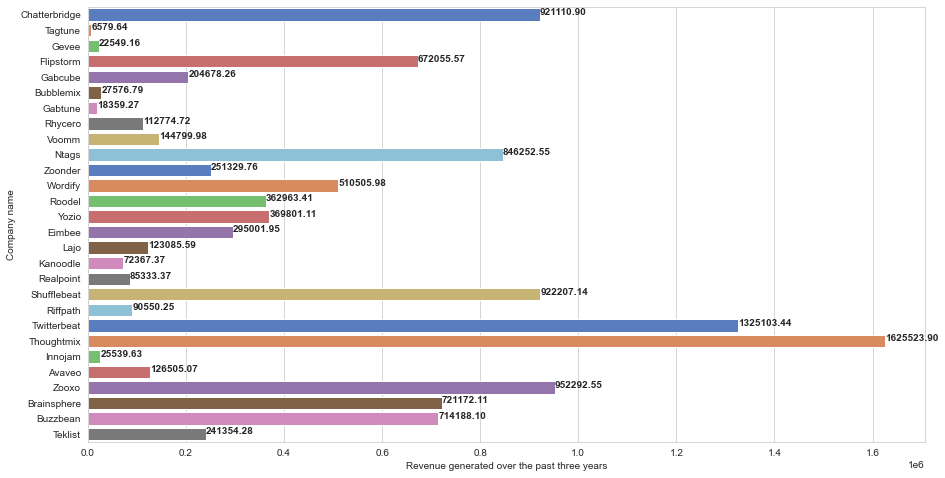

In [20]:
# data visulalization

# convert to Pandas data frame to draw a chart
revenue_pd = revenue.toPandas()

# Horizontal bar chart
sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(15,8))
ax = sns.barplot(x='revenue', y='company', data=revenue_pd, ci=None, palette="muted",orient='h' )
ax.set_title("", fontsize=15)
ax.set_xlabel ("Revenue generated over the past three years")
ax.set_ylabel ("Company name")
for rect in ax.patches:
    ax.text (rect.get_width(), rect.get_y() + rect.get_height() / 2,"%.2f"% rect.get_width(), weight='bold' )

plt.show()

`Description`:

- Here we used a horizontal bar chart instead of a pie chart to illustrate the revenue each customer has generated over the three-year period, since there are too many companies. 

- We'd talk about something other than rankings because we are going to mention he top 5 most revenue-generating customers in the next part. 

- As we can see from the figure that, profits our company made on customers have a high variance. Thoughtmix has generated over 1 million Euro revenue, while the amount from Tagtune is only 6500. From a rough glance, we have a guess that our company's income relies on a few main partners. We'd verify this guess in the next part, by looking at the top 5 largest customers and their purchase orders.   


#### 2.2. What are the top 5 most revenue-generating customers? (7.5 pts)

Identify your best 5 customers. 


In [21]:
# ifentify best 5 customers by SQL queries
query = """
SELECT company, country, sum(price) as revenue
FROM transactions
GROUP BY company, country
ORDER BY revenue DESC
LIMIT 5
"""
best_5 = spark.sql(query)
best_5.show()

+-------------+--------------+------------------+
|      company|       country|           revenue|
+-------------+--------------+------------------+
|   Thoughtmix|      Portugal|1625523.8991479874|
|  Twitterbeat|        France|1325103.4394199848|
|        Zooxo|United Kingdom| 952292.5544662476|
|  Shufflebeat|      Portugal| 922207.1397099495|
|Chatterbridge|         Spain| 921110.8999226093|
+-------------+--------------+------------------+



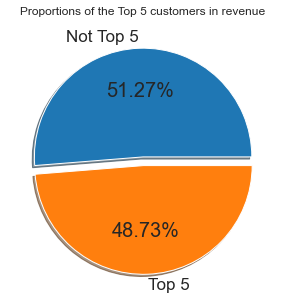

In [22]:
# what about the proportion?
revenue.registerTempTable("revenue")
query = """
SELECT sum(revenue)
FROM revenue
"""
sum_order = spark.sql(query)
#sum_order.show()

best_5.registerTempTable("best_5")
query = """
SELECT sum(revenue)
FROM best_5
"""
sum_order_5 = spark.sql(query)
#sum_order_5.show()

# plot pie chart
ratio = sum_order_5.select('sum(revenue)').first()[0] / sum_order.select('sum(revenue)').first()[0] 
plt.figure(figsize=(5, 5))
patches, l_text, p_text = plt.pie([1-ratio, ratio], explode=[0, 0.08], labels=['Not Top 5', 'Top 5'], shadow=True, autopct = '%.2f%%')
for t in l_text:
    t.set_size(17)
for t in p_text:
    t.set_size(20)
plt.title("Proportions of the Top 5 customers in revenue")    
plt.show()

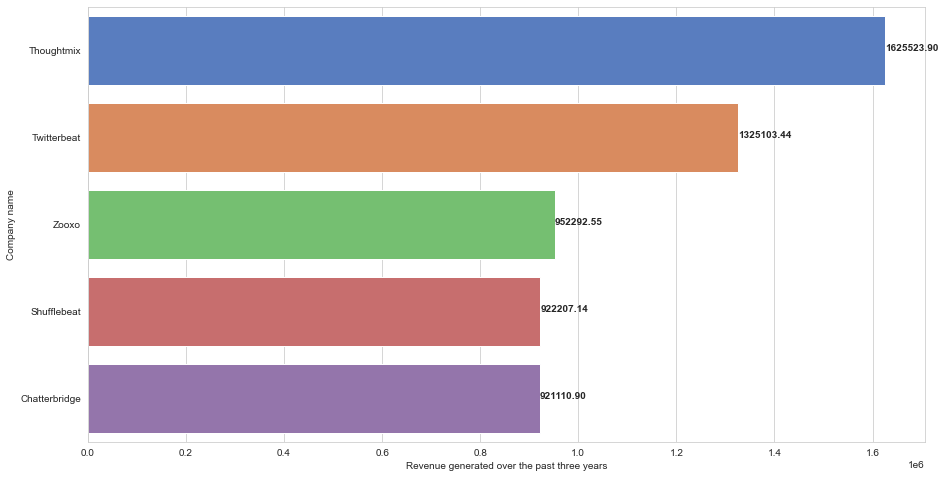

In [23]:
# Visualization

# convert to Pandas data frame to draw a chart
best_5_pd = best_5.toPandas()

# Horizontal bar chart
sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(15,8))
ax = sns.barplot(x='revenue', y='company', data=best_5_pd, ci=None, palette="muted",orient='h' )
ax.set_title("", fontsize=15)
ax.set_xlabel ("Revenue generated over the past three years")
ax.set_ylabel ("Company name")
for rect in ax.patches:
    ax.text (rect.get_width(), rect.get_y() + rect.get_height() / 2,"%.2f"% rect.get_width(), weight='bold' )

plt.show()

`Description`:

It's illustrated in the figure that, Thoughtmix is our largest partner in the past three years. It has brought us an income of more than one million Euros. Our top 5 largest customers, Thoughtmix, Twitterbeat, Zooxo, Shufflebeat and Chatterbridge are all from Europe, and three of them are located in the Iberian Peninsula. This fact indicates that if our company wants to be more global, it will need to exploit more oversea markets. Incomes from the top 5 customers took up 48.9% of our revenue from 2016 to 2018, while the number of the rest 23 companies is only 51.1%.  Plus, in these five customers, Thoughtmix and Twitterbeat generated appearantly higher revenue than the rest three. 

Are the most revenue-generating customers making particularly large purchase orders? 

Compute the answer, plot appropriately, and write a paragraph describing the findings.

In top 10 orders, there are 3 from top 5 companies.
In top 20 orders, there are 9 from top 5 companies.
In top 50 orders, there are 20 from top 5 companies.
In top 100 orders, there are 43 from top 5 companies.
In top 500 orders, there are 223 from top 5 companies.
In top 1000 orders, there are 456 from top 5 companies.


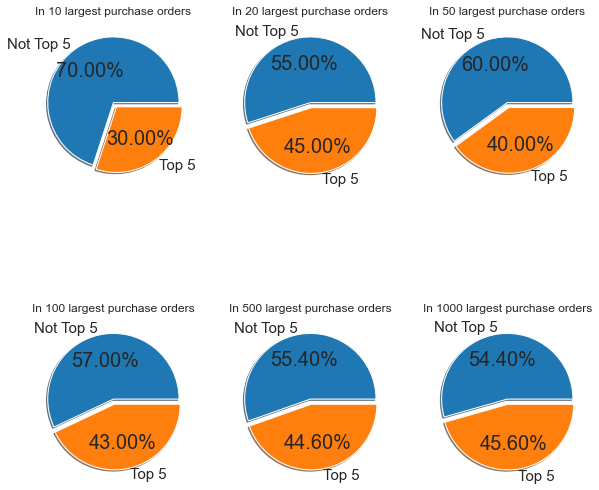

In [24]:
# rank the purchase orders

def calcPor(k):
    # let's explore top k largest purchase orders
    
    # order purchases descently
    query = """
    SELECT company, price
    FROM transactions
    ORDER BY price DESC
    LIMIT {}
    """.format(k)
    orders = spark.sql(query)
    orders.registerTempTable("orders")

    query = """
    SELECT company, price
    FROM orders
    WHERE (company='Thoughtmix') OR (company='Twitterbeat') OR (company='Zooxo') OR (company='Chatterbridge') OR (company=' Shufflebeat')
    ORDER BY price DESC
    """
    orders_5 = spark.sql(query)
    print('In top {} orders, there are {} from top 5 companies.'.format(k, orders_5.count()))
    
    return orders_5.count()/k

num = [10, 20, 50, 100, 500, 1000]
plt.figure(figsize=(10, 10))
for i in range(6):
    n = num[i]
    ratio = calcPor(n)
    plt.subplot(2, 3, i+1)
    patches, l_text, p_text = plt.pie([1-ratio, ratio], explode=[0, 0.08], labels=['Not Top 5', 'Top 5'], shadow=True, autopct = '%.2f%%')
    for t in l_text:
        t.set_size(15)
    for t in p_text:
        t.set_size(20)
    plt.title("In {} largest purchase orders".format(n))
    
plt.show()

`Description`:

Are the most revenue-generating customers making particularly large purchase orders? According to our analysis, the answer would be, yes. We ranked purchase orders by their price, and found that, the top 5 customers accounted for nearly half of the largest 20, 50, 100, 500 and 1000 deals. In the 10 most profitable orders, they also took up 30%. Our company made many big deals with the top 5 customers.  

Are they making a lot of purchases? 

Compute the answer, plot appropriately, and write a paragraph describing the findings.


In [25]:
query = """
SELECT company, count(price) as purchase
FROM transactions
GROUP BY company
ORDER BY purchase DESC
 """
pcs_num = spark.sql(query)
pcs_num.show(40)

+-------------+--------+
|      company|purchase|
+-------------+--------+
|   Thoughtmix|    2790|
|  Twitterbeat|    2265|
|        Zooxo|    1672|
|Chatterbridge|    1587|
|  Shufflebeat|    1551|
|        Ntags|    1514|
|     Buzzbean|    1252|
|  Brainsphere|    1241|
|    Flipstorm|    1190|
|      Wordify|     969|
|        Yozio|     655|
|       Roodel|     626|
|       Eimbee|     498|
|      Zoonder|     455|
|      Teklist|     427|
|      Gabcube|     357|
|        Voomm|     249|
|         Lajo|     221|
|       Avaveo|     211|
|      Rhycero|     203|
|    Realpoint|     158|
|     Riffpath|     151|
|     Kanoodle|     127|
|    Bubblemix|      54|
|      Innojam|      44|
|        Gevee|      36|
|      Gabtune|      27|
|      Tagtune|      12|
+-------------+--------+



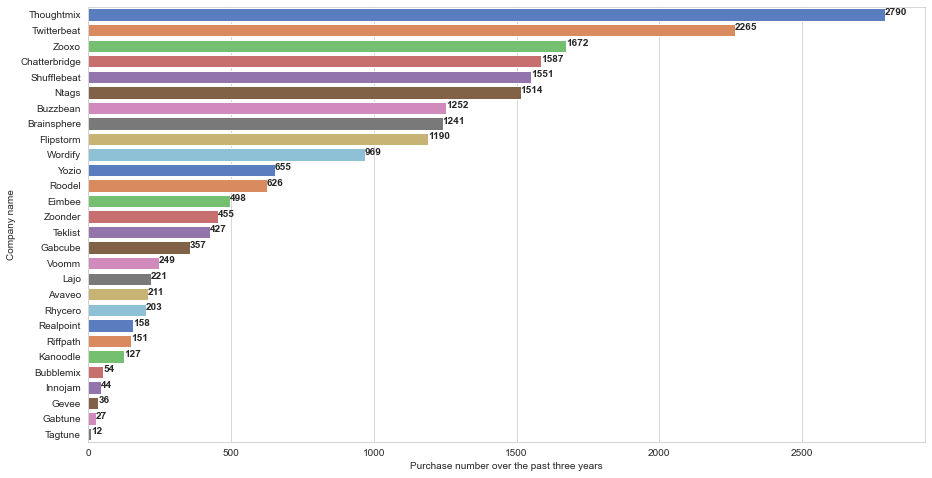

In [26]:
# convert to Pandas data frame to draw a chart
pcs_num_pd = pcs_num.toPandas()

# Horizontal bar chart
sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(15,8))
ax = sns.barplot(x='purchase', y='company', data=pcs_num_pd, ci=None, palette="muted",orient='h' )
ax.set_title("", fontsize=15)
ax.set_xlabel ("Purchase number over the past three years")
ax.set_ylabel ("Company name")
for rect in ax.patches:
    ax.text (rect.get_width(), rect.get_y() + rect.get_height() / 2,"%d"% rect.get_width(), weight='bold' )

plt.show()

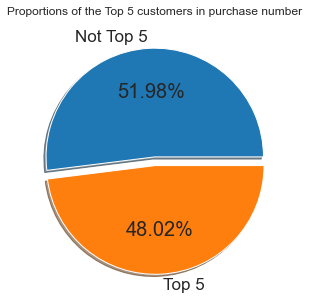

In [27]:
# what about the proportion?
pcs_num.registerTempTable("pcs_num")
query = """
SELECT sum(purchase)
FROM pcs_num
"""
sum_pcs = spark.sql(query)
#sum_pcs.show()

query = """
SELECT company, purchase
FROM pcs_num
LIMIT 5
"""
pcs_5 = spark.sql(query)

pcs_5.registerTempTable("pcs_5")
query = """
SELECT sum(purchase)
FROM pcs_5
"""

sum_pcs_5 = spark.sql(query)
#sum_pcs_5.show()

# plot pie chart
ratio = sum_pcs_5.select('sum(purchase)').first()[0] / sum_pcs.select('sum(purchase)').first()[0] 
plt.figure(figsize=(5, 5))
patches, l_text, p_text = plt.pie([1-ratio, ratio], explode=[0, 0.08], labels=['Not Top 5', 'Top 5'], shadow=True, autopct = '%.2f%%')
for t in l_text:
    t.set_size(17)
for t in p_text:
    t.set_size(20)
plt.title("Proportions of the Top 5 customers in purchase number")    
plt.show()

`Description`:

The top 5 largest customers did order a lot of purchases. Proofs lie behind the fact that they were also the top 5 partners regarding deal number. Their purchases number accounted for 48.02% over the past three years.   

#### 2.3. Which parts have become more popular lately, also which are becoming less popular? (5 pts)

Improving stock turnover is important to a company. Large quantites of a product that don't sell will bring no revenue to the company as well as storage costs. Too few parts of a popular item may lead to possibly lost sales as they risk being sold out.

Compute the answer, plot appropriately, and write a paragraph describing the findings.

In [28]:
print('Our company is selling {} different kinds of parts. '.format(df.select('part').distinct().count()))

Our company is selling 101 different kinds of parts. 


In [32]:
'''
NB: Here we removed null values in 'parts'
'''
df_new = df.filter(df.part. isNotNull())
df_new.registerTempTable("transactions")

In [33]:
'''
Trend over years
NB: Here we first define "trend" to be the sales' yearly changes from 2016 to 2018
'''
# sales of parts over the past three years
query = """
SELECT a.part as part, a.sales as 2016_sales, b.sales as 2017_sales, c.sales as 2018_sales
FROM (
SELECT part, count(part) as sales
FROM transactions
WHERE year=2016
GROUP BY part
) as a,
(
SELECT part, count(part) as sales
FROM transactions
WHERE year=2017
GROUP BY part
) as b,
(
SELECT part, count(part) as sales
FROM transactions
WHERE year=2018
GROUP BY part
) as c
WHERE (a.part=b.part) and (a.part=c.part)

"""
count_part = spark.sql(query)
count_part.show(100)

+----------+----------+----------+----------+
|      part|2016_sales|2017_sales|2018_sales|
+----------+----------+----------+----------+
| 98132-889|        81|        75|        75|
| 76314-002|        77|        57|        65|
| 52125-444|        54|        64|        60|
| 55700-014|        82|        69|        94|
| 49738-105|        82|        79|        71|
| 51138-049|       110|        76|        93|
| 76117-001|        46|        43|        35|
| 70253-307|        77|        82|        75|
| 68752-024|        86|        92|        90|
| 41163-428|        87|        64|        59|
| 52343-025|        84|        88|        91|
| 58596-001|        66|        51|        55|
|48951-4042|        80|        81|        76|
| 76454-100|       111|        77|        77|
| 21695-267|        69|        70|        49|
| 35356-325|        81|        85|        63|
|49288-0655|        48|        32|        35|
| 50563-113|        72|        60|        75|
|58118-5060|        92|       108|

In [34]:
# which 5 parts are becoming popular in a steepest way?
count_part.registerTempTable("count_part")
query = """
SELECT part, (2018_sales - 2016_sales) as diff 
FROM count_part
ORDER BY diff DESC
LIMIT(5)
"""

inc_part = spark.sql(query)
inc_part.show()

+----------+----+
|      part|diff|
+----------+----+
| 55289-164|  14|
| 55700-014|  12|
|54868-0823|  12|
|54868-6311|  11|
| 51523-002|   8|
+----------+----+



In [35]:
# which are becoming less popular?
query = """
SELECT part, (2018_sales - 2016_sales) as diff 
FROM count_part
ORDER BY diff
LIMIT(5)
"""

dec_part = spark.sql(query)
dec_part.show()

+----------+----+
|      part|diff|
+----------+----+
|65044-3014| -44|
|62011-0219| -37|
| 0603-6134| -36|
| 49967-724| -35|
| 76454-100| -34|
+----------+----+



In [36]:
# combine two tables and reorder
inc_part.registerTempTable("inc_part")
dec_part.registerTempTable("dec_part")
query = """
SELECT * 
FROM inc_part UNION ALL 
SELECT * 
FROM dec_part
"""
diff_part = spark.sql(query)
diff_part.registerTempTable("diff_part")
query = """
SELECT *
FROM diff_part
ORDER BY diff DESC
"""
diff_part = spark.sql(query)
diff_part.show()

+----------+----+
|      part|diff|
+----------+----+
| 55289-164|  14|
|54868-0823|  12|
| 55700-014|  12|
|54868-6311|  11|
| 51523-002|   8|
| 76454-100| -34|
| 49967-724| -35|
| 0603-6134| -36|
|62011-0219| -37|
|65044-3014| -44|
+----------+----+



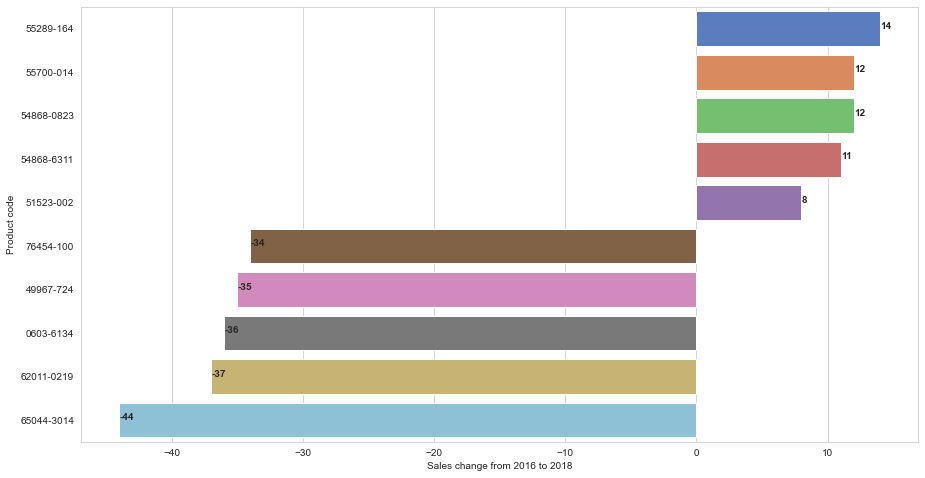

In [37]:
# convert to Pandas data frame to draw a chart
diff_part_pd = diff_part.toPandas()

# Horizontal bar chart
sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(15,8))
ax = sns.barplot(x='diff', y='part', data=diff_part_pd, ci=None, palette="muted",orient='h' )
ax.set_title("", fontsize=15)
ax.set_xlabel ("Sales change from 2016 to 2018")
ax.set_ylabel ("Product code")
for rect in ax.patches:
    ax.text (rect.get_width(), rect.get_y() + rect.get_height() / 2,"%d"% rect.get_width(), weight='bold' )

plt.show()

`Description`: 

Our star products is 55289-164. They both have a huge increase in sales lately. The company may need to order more 55289-164 while reducing the inventory of 65044-3014. 65044-3014 is no longer popular as three years before.  

In [38]:
'''
Expect more from the data: which products kept increasing or decreasing over the past three years? 
'''
query = """
SELECT part, (2018_sales - 2016_sales) as diff 
FROM count_part
WHERE ((2018_sales - 2017_sales)>0) and (((2017_sales - 2016_sales)>0))
ORDER BY diff DESC
LIMIT(5)
"""

keep_inc_part = spark.sql(query)
keep_inc_part.show()

+----------+----+
|      part|diff|
+----------+----+
|54868-0823|  12|
| 52343-025|   7|
| 52125-136|   7|
|54973-9150|   7|
| 0268-1401|   3|
+----------+----+



In [39]:
query = """
SELECT part, (2018_sales - 2016_sales) as diff 
FROM count_part
WHERE ((2018_sales - 2017_sales)<0) and (((2017_sales - 2016_sales)<0))
ORDER BY diff
LIMIT(5)
"""

keep_dec_part = spark.sql(query)
keep_dec_part.show()

+----------+----+
|      part|diff|
+----------+----+
|65044-3014| -44|
|62011-0219| -37|
| 0603-6134| -36|
| 0268-6107| -34|
| 68462-565| -33|
+----------+----+



In [40]:
# combine two tables and reorder
keep_inc_part.registerTempTable("inc_part")
keep_dec_part.registerTempTable("dec_part")
query = """
SELECT * 
FROM inc_part UNION ALL 
SELECT * 
FROM dec_part
"""
diff_part = spark.sql(query)

diff_part.registerTempTable("diff_part")
query = """
SELECT *
FROM diff_part
ORDER BY diff DESC
"""
diff_part = spark.sql(query)
diff_part.show()

+----------+----+
|      part|diff|
+----------+----+
|54868-0823|  12|
| 52125-136|   7|
| 52343-025|   7|
|54973-9150|   7|
| 0268-1401|   3|
| 68462-565| -33|
| 0268-6107| -34|
| 0603-6134| -36|
|62011-0219| -37|
|65044-3014| -44|
+----------+----+



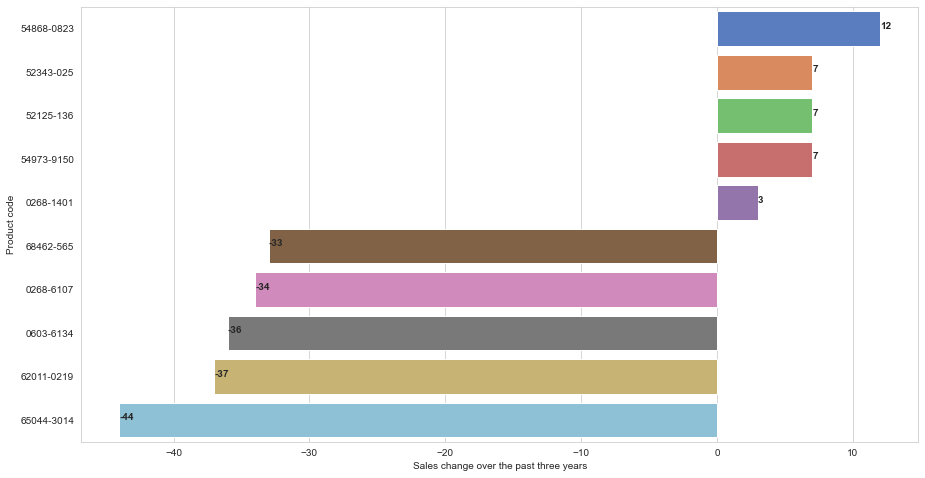

In [41]:
# convert to Pandas data frame to draw a chart
diff_part_pd = diff_part.toPandas()

# Horizontal bar chart
sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(15,8))
ax = sns.barplot(x='diff', y='part', data=diff_part_pd, ci=None, palette="muted",orient='h' )
ax.set_title("", fontsize=15)
ax.set_xlabel ("Sales change over the past three years")
ax.set_ylabel ("Product code")
for rect in ax.patches:
    ax.text (rect.get_width(), rect.get_y() + rect.get_height() / 2,"%d"% rect.get_width(), weight='bold' )

plt.show()

`Description`:

Take a long-term view, we suggest our company to increase the inventory of 54868-0823. It's sales kept increasing over the past three years, with an increase of 12. For the similar reason, the company ought to find out the factor why 65044-3014 is no longer popular. Maybe it's because of the market preferences. 

In [42]:
'''
Lastly, let's have a look at quarter trend
'''
def investYear(year, part):
    query = """
    SELECT quarter, count(price) as sales
    FROM transactions
    WHERE (year={}) and (part='{}')
    GROUP BY quarter
    ORDER BY quarter
    """.format(year, part)
    tmp = spark.sql(query)
    return tmp

def investPart(part):
    # quarter sales in each year for a part 
    tmp_16 = investYear(2016, part)
    tmp_17 = investYear(2017, part)
    tmp_18 = investYear(2018, part)
    tmp_16.registerTempTable("tmp_16")
    tmp_17.registerTempTable("tmp_17")
    tmp_18.registerTempTable("tmp_18")
    
    query = """
    SELECT * 
    FROM tmp_16 UNION ALL 
    SELECT * 
    FROM tmp_17 UNION ALL
    SELECT *
    from tmp_18 
    """
    tmp = spark.sql(query)
    return tmp

In [43]:
# Visulaize the trend
part_name = count_part.toPandas()['part'].values

In [8]:
'''
NB: This cell can be very time-costing when running.
'''
# calculate each part's sales trend
sales_trend = {}
for i in range(len(part_name)):
    tmp = investPart(part_name[i])
    tmp = tmp.toPandas()
    sales_trend[part_name[i]] = tmp.sales.values

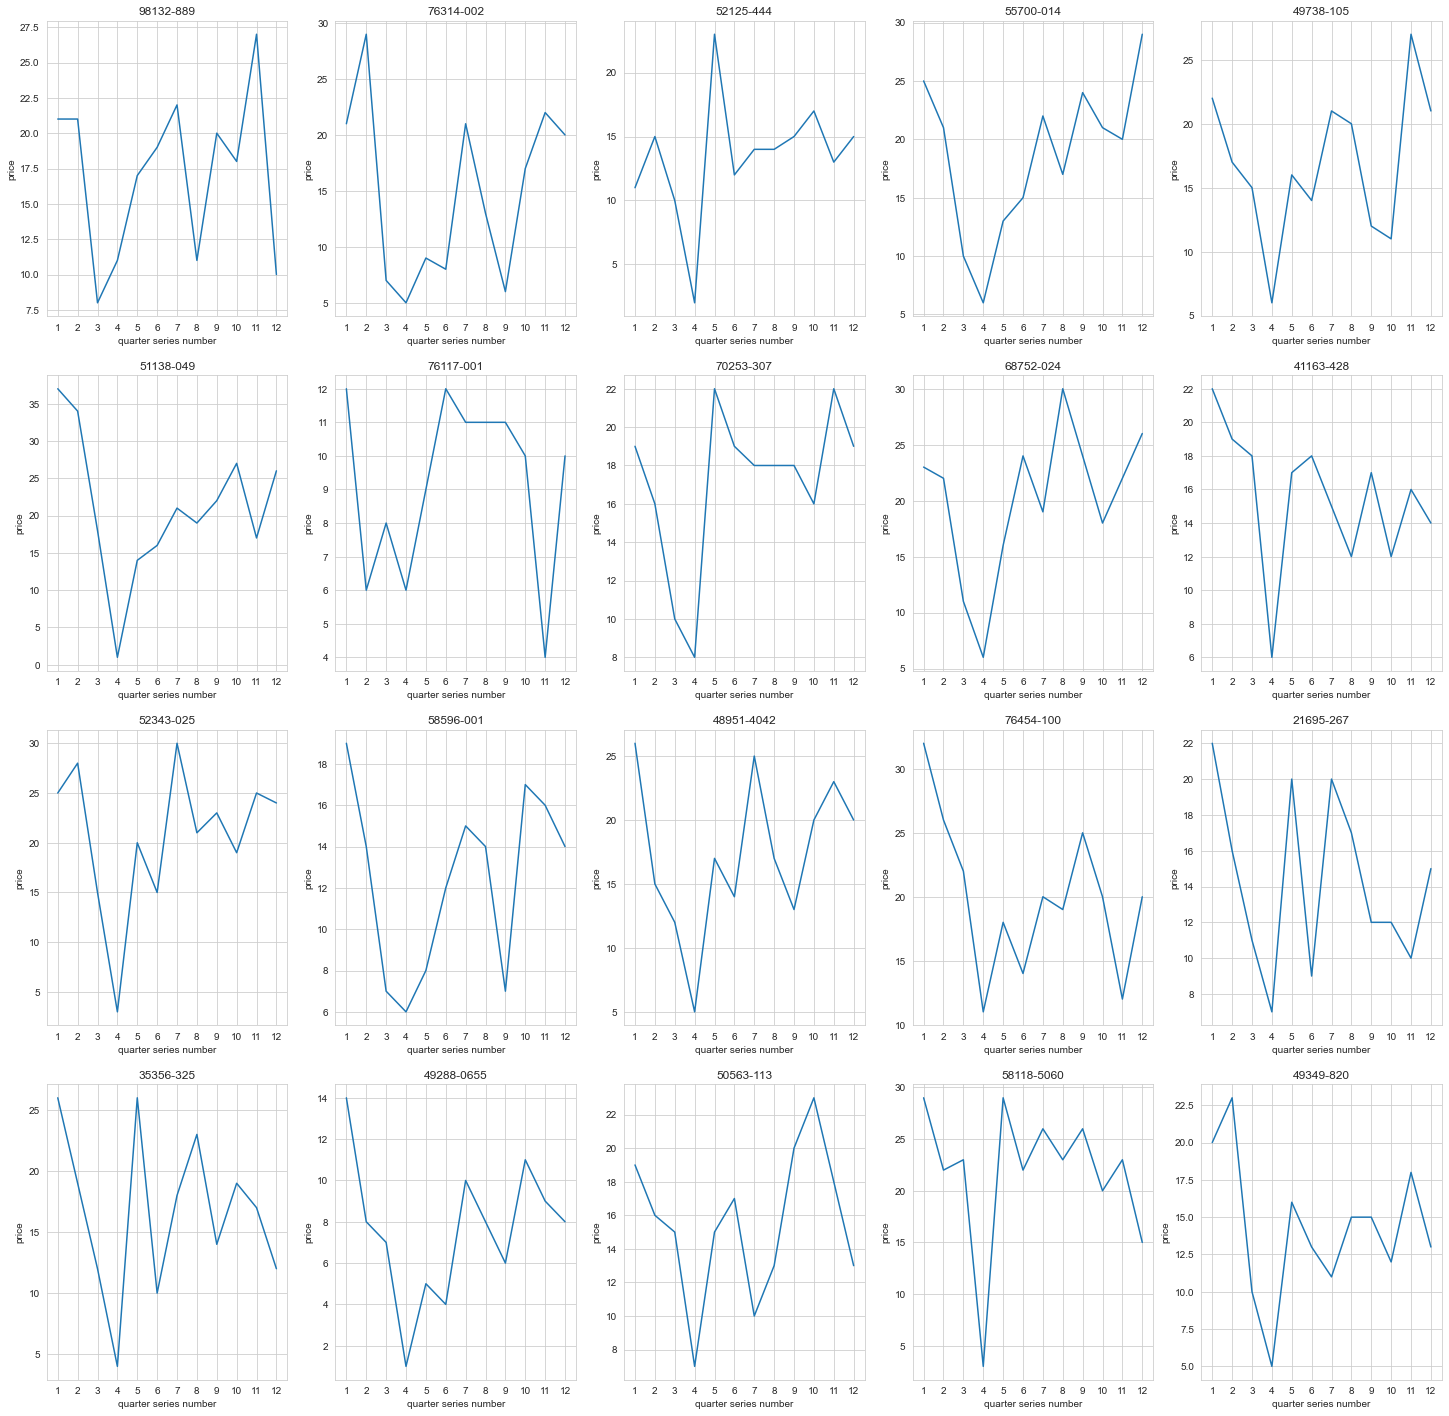

'\nIn the x label "quarter series number": 1-4 mean four quarters in 2016, 5-8 mean those in 2017, 9-12 mean those in 2018. \n'

In [45]:
'''
In the x label "quarter series number": 1-4 mean four quarters in 2016, 5-8 mean those in 2017, 9-12 mean those in 2018. 
'''
# There are too many (100) parts, I plan to show them in 20s
# 1 - 20
plt.figure(figsize=(25, 25))
for i in range(20):
    plt.subplot(4, 5, i+1)
    name = part_name[i]
    plt.plot(range(1, len(sales_trend[name])+1), sales_trend[name])
    plt.title(name)
    plt.xlabel('quarter series number')
    plt.ylabel('price')
    plt.xticks(range(1, 13))
plt.show()

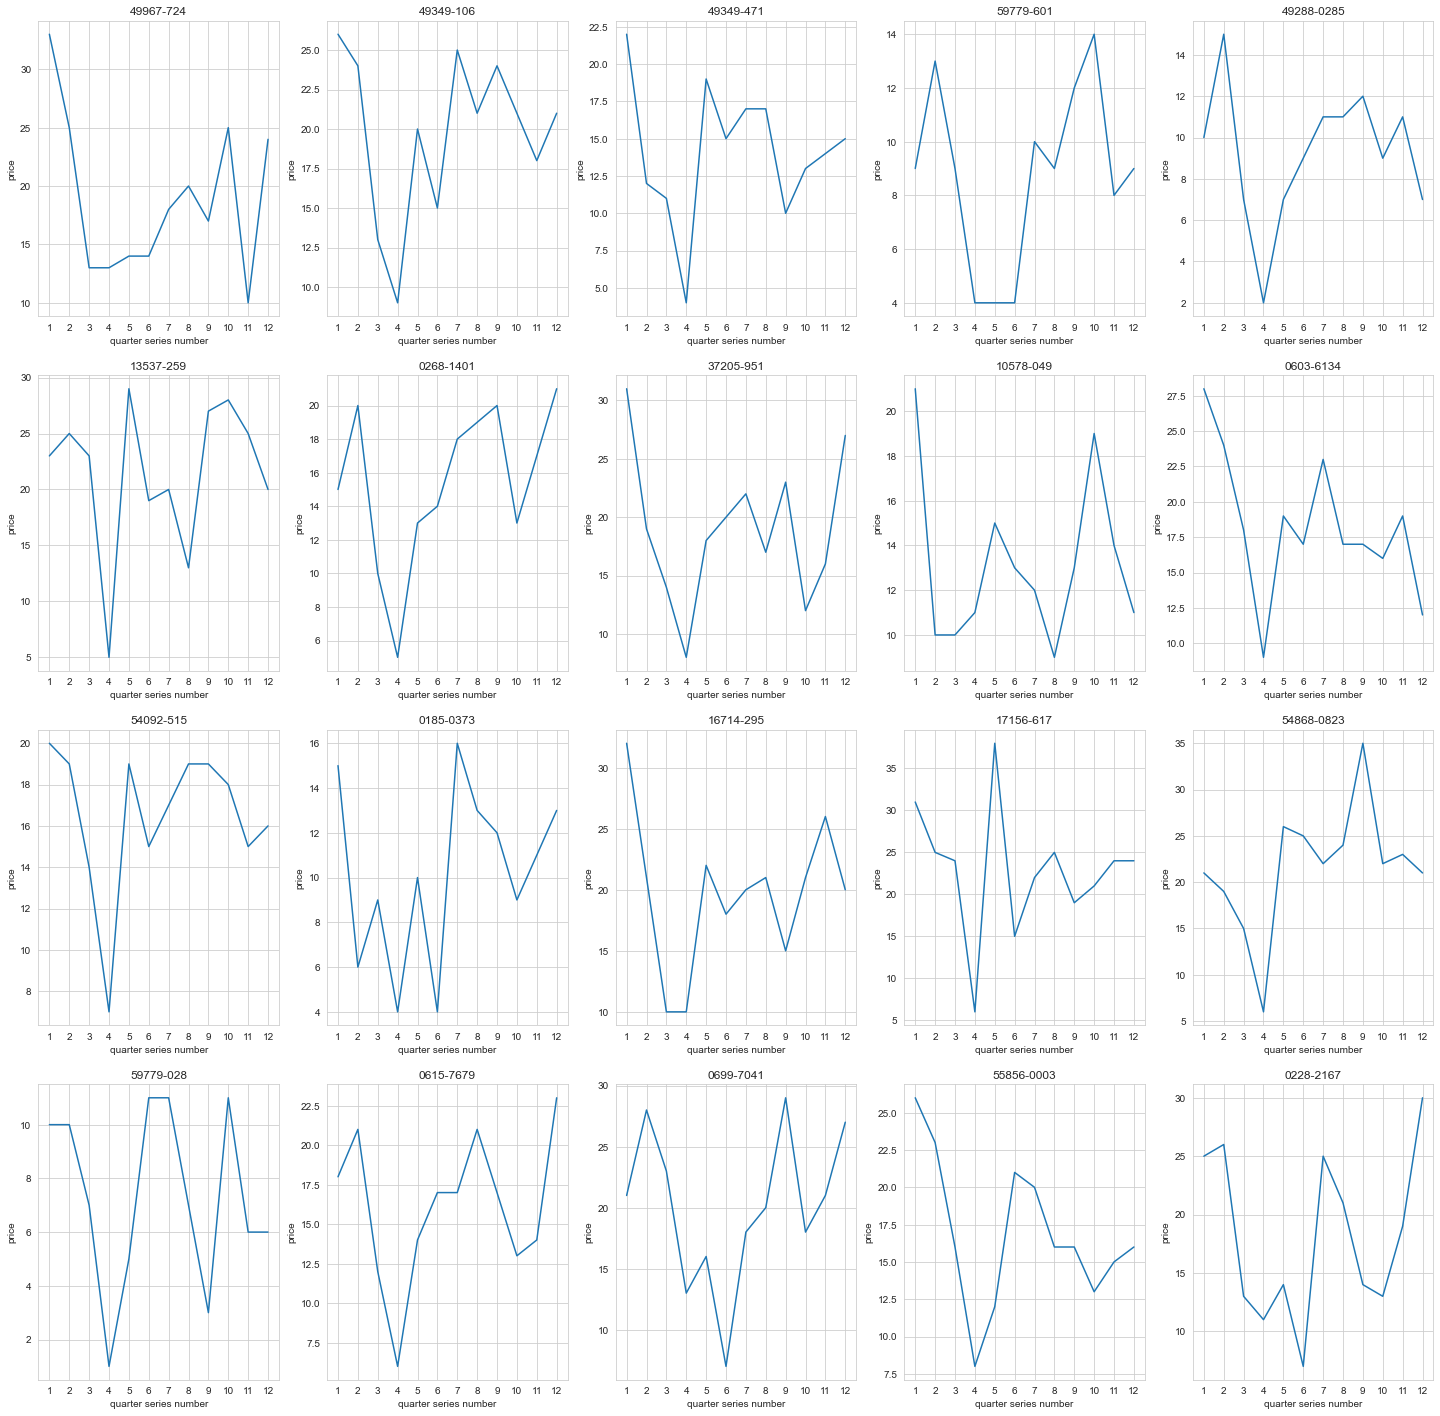

In [46]:
# 21 - 40
plt.figure(figsize=(25, 25))
for i in range(20):
    plt.subplot(4, 5, i+1)
    name = part_name[i+20]
    plt.plot(range(1, len(sales_trend[name])+1), sales_trend[name])
    plt.title(name)
    plt.xlabel('quarter series number')
    plt.ylabel('price')
    plt.xticks(range(1, 13))
plt.show()

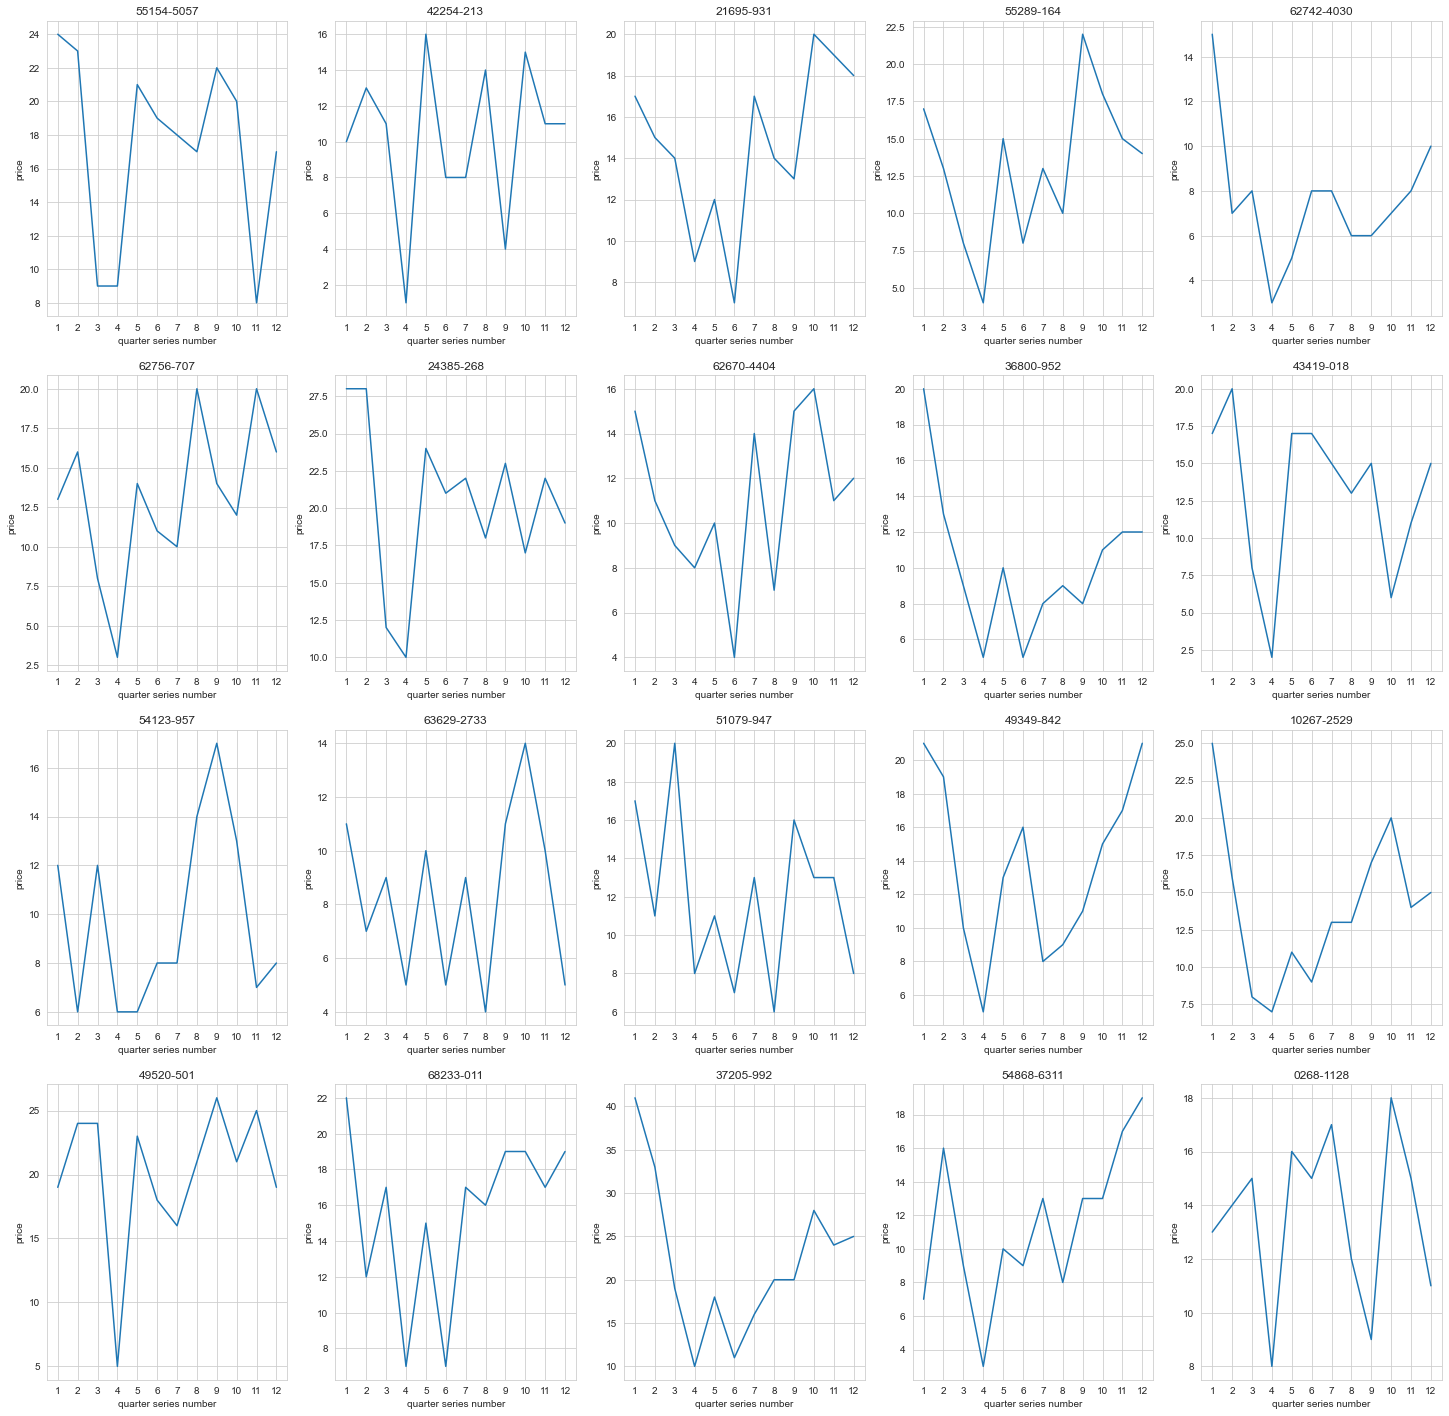

In [47]:
# 41 - 60
plt.figure(figsize=(25, 25))
for i in range(20):
    plt.subplot(4, 5, i+1)
    name = part_name[i+40]
    plt.plot(range(1, len(sales_trend[name])+1), sales_trend[name])
    plt.title(name)
    plt.xlabel('quarter series number')
    plt.ylabel('price')
    plt.xticks(range(1, 13))
plt.show()

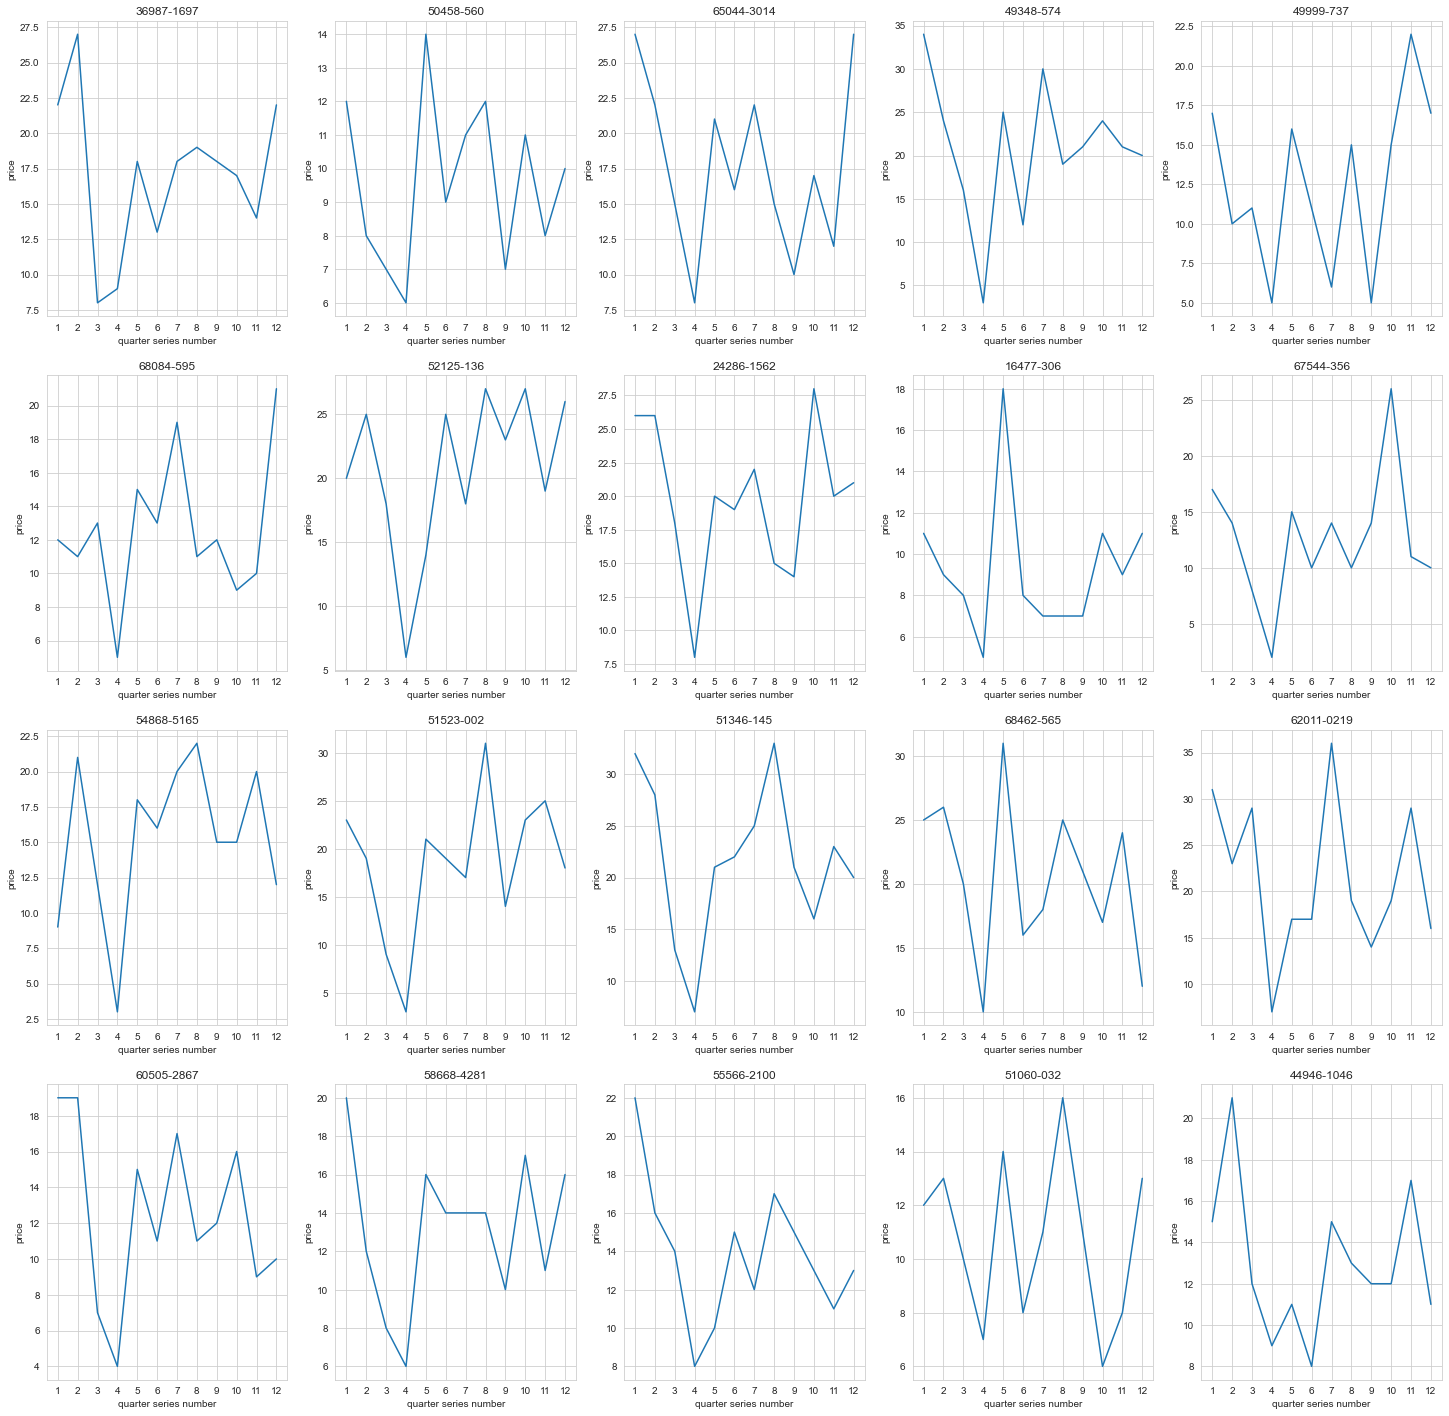

In [48]:
# 61 - 80
plt.figure(figsize=(25, 25))
for i in range(20):
    plt.subplot(4, 5, i+1)
    name = part_name[i+60]
    plt.plot(range(1, len(sales_trend[name])+1), sales_trend[name])
    plt.title(name)
    plt.xlabel('quarter series number')
    plt.ylabel('price')
    plt.xticks(range(1, 13))
plt.show()

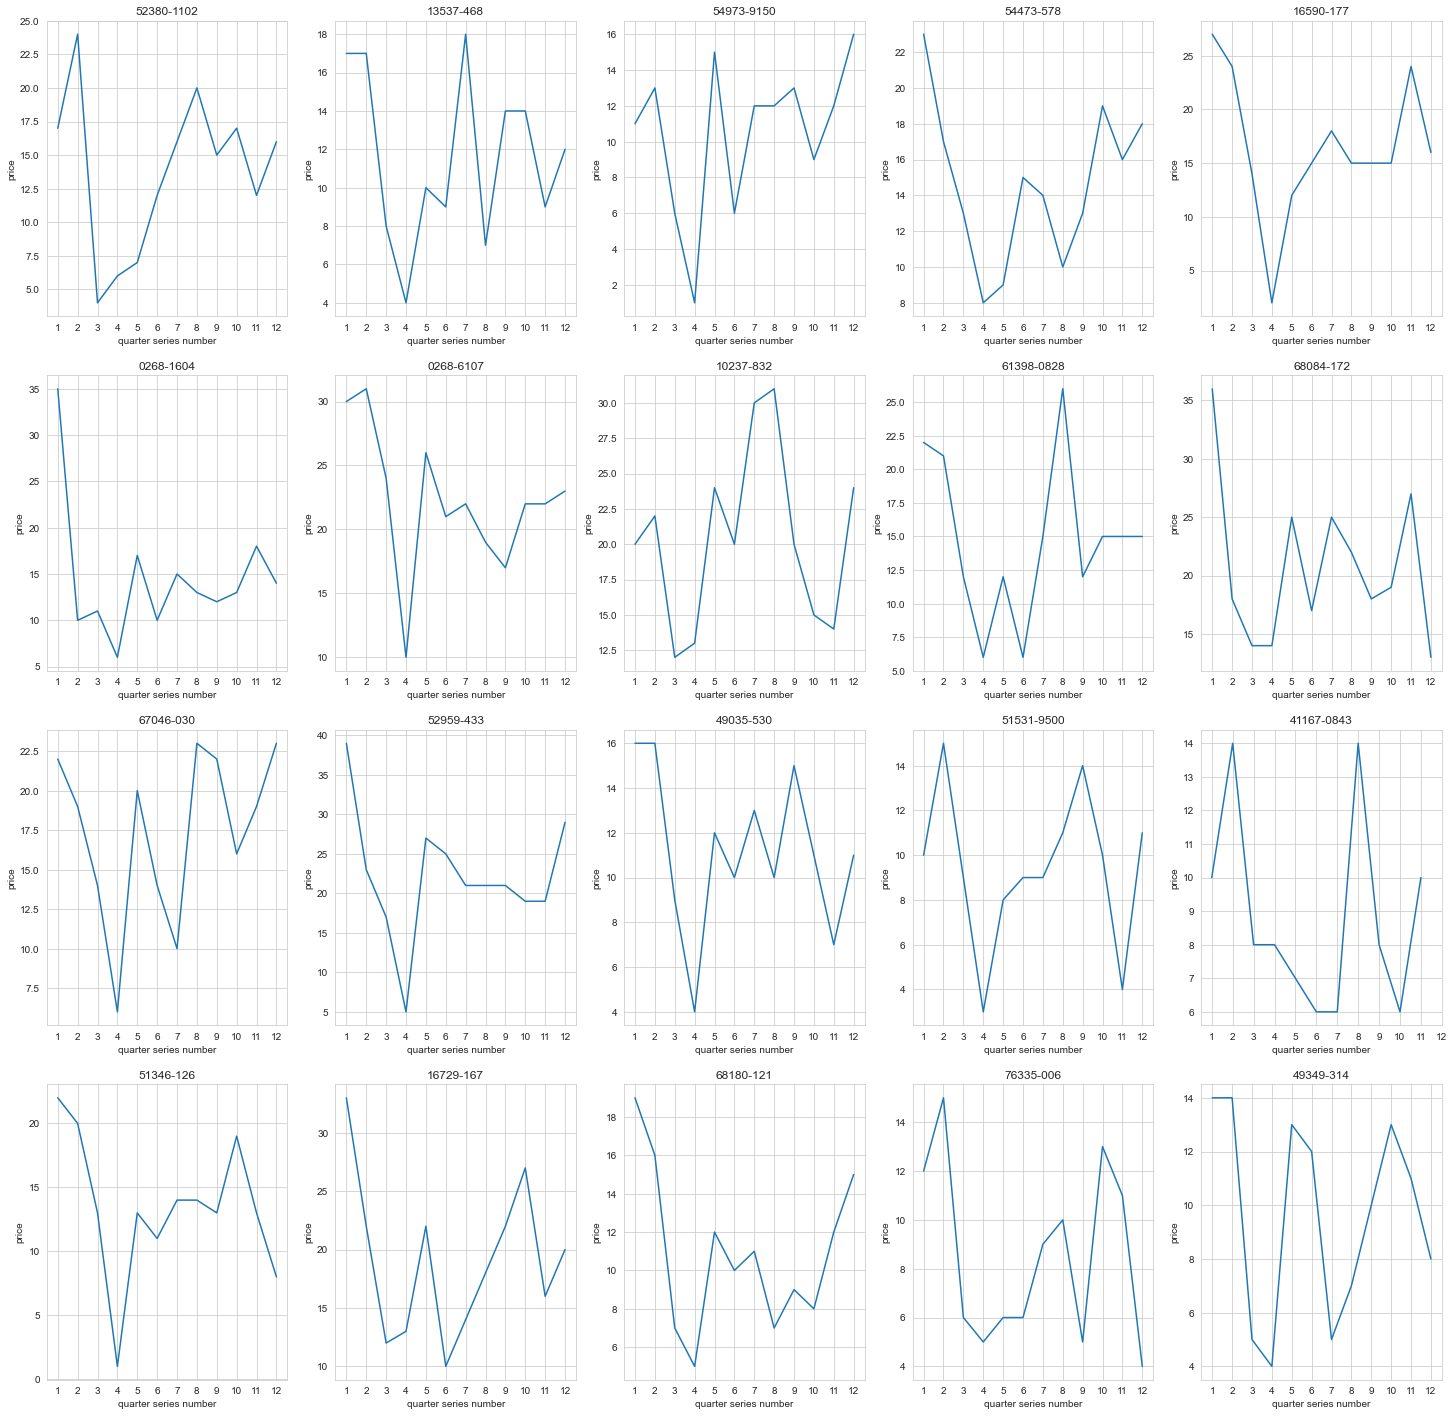

In [49]:
# 81 - 100
plt.figure(figsize=(25, 25))
for i in range(20):
    plt.subplot(4, 5, i+1)
    name = part_name[i+80]
    plt.plot(range(1, len(sales_trend[name])+1), sales_trend[name])
    plt.title(name)
    plt.xlabel('quarter series number')
    plt.ylabel('price')
    plt.xticks(range(1, 13))
plt.show()

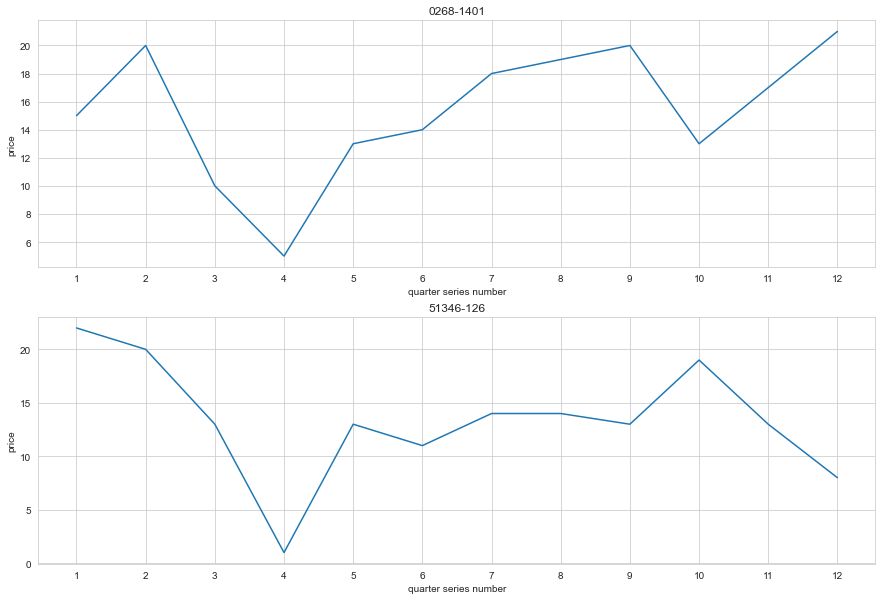

In [55]:
'''
Until here, I guess there are too many figures for the boss. Let's look at some typical graphs!
'''
plt.figure(figsize=(15, 10))
namelist=['0268-1401', '51346-126']
for i in range(len(namelist)):
    plt.subplot(len(namelist), 1, i+1)
    plt.plot(range(1, len(sales_trend[name])+1), sales_trend[namelist[i]])
    plt.title(namelist[i])
    plt.xlabel('quarter series number')
    plt.ylabel('price')
    plt.xticks(range(1, 13))
plt.show()

`Description`:

We noticed that the parts' prices infructuated over quarters. Some parts, such as 0268-1401, are becoming more and more popular lately. Some parts, such as 51346-126 are attracting less attention lately.    

#### 2.4. What is the average price paid for a part and the price history for parts? (5 pts)

Identify product trends. If a product is very expensive and purchase orders are going down, it might be worth considering the price of the item, as well as its relevance in the market. If a product has suddenly become very popular, it could be interesting to increase the price and see if costumers will continue to buy it, as this could increase profit for the company.

Compute the answer, plot appropriately, and write a paragraph describing the findings.

In [56]:
# explore correlation between average price and sales in the three-year period
query = """
SELECT a.part as part, a.avg_price as avg_price, b.sales as sales
FROM (
SELECT part, avg(price) as avg_price
FROM transactions
GROUP BY part
) as a,
(
SELECT part, count(part) as sales
FROM transactions
GROUP BY part
) as b
WHERE (a.part=b.part)
ORDER BY avg_price DESC

"""

part_info = spark.sql(query)
part_info.show(5)

+----------+-----------------+-----+
|      part|        avg_price|sales|
+----------+-----------------+-----+
| 17156-617|991.5159173155309|  299|
| 0268-1401|989.1376238602859|  208|
| 16477-306|985.7789364024105|  117|
|51531-9500|973.8901575482081|  126|
| 0185-0373|972.3883462056626|  137|
+----------+-----------------+-----+
only showing top 5 rows



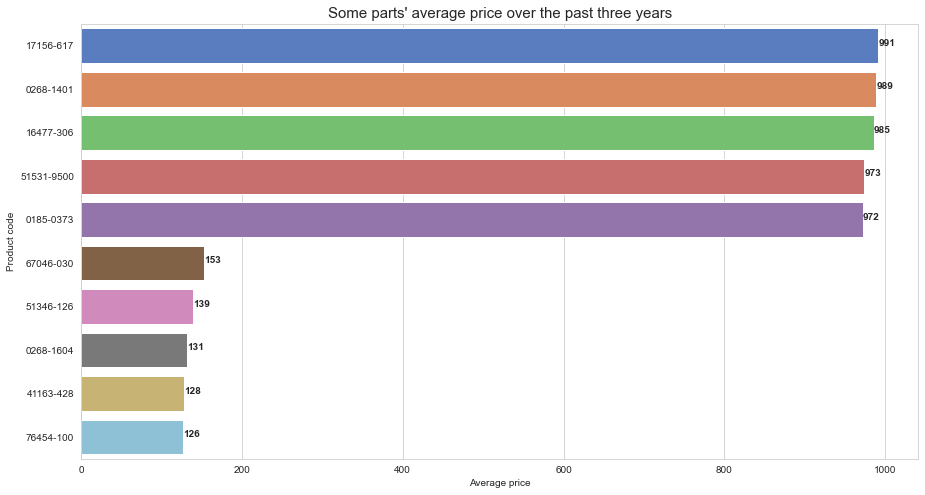

In [57]:
'''
There are 100 parts. To make a more clear visualization, we only showed the most expensive 5 and cheapest 5 parts. 
'''
# convert to Pandas data frame to draw a chart
part_info_pd = part_info.toPandas()

# Horizontal bar chart
sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(15,8))
ax = sns.barplot(x='avg_price', y='part', data=part_info_pd.head(5).append(part_info_pd.tail(5)), ci=None, palette="muted",orient='h' )
ax.set_title("Some parts' average price over the past three years", fontsize=15)
ax.set_xlabel ("Average price")
ax.set_ylabel ("Product code")
for rect in ax.patches:
    ax.text (rect.get_width(), rect.get_y() + rect.get_height() / 2,"%d"% rect.get_width(), weight='bold' )

plt.show()

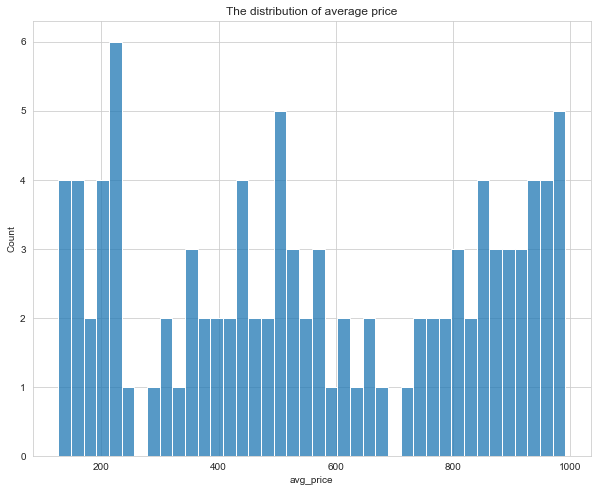

In [58]:
# The distribution of parts average price
plt.figure(figsize=(10, 8))
plt.title('The distribution of average price')
sns.histplot(part_info_pd['avg_price'], bins=40)
plt.show()

`Description`:

- Our company's most expensive part is 17156-617. Its average price didn't exceed 1000 Euro, we guess it's kind of pricing strategy. 999 Euro looks much cheaper than 1001 Euro. The cheapest part is 76454-100. 
- The average prices mainly lie in three ranges. The distribution of parts' average price means that our company sells products to high-end, mid and low-end markets at the same time.  

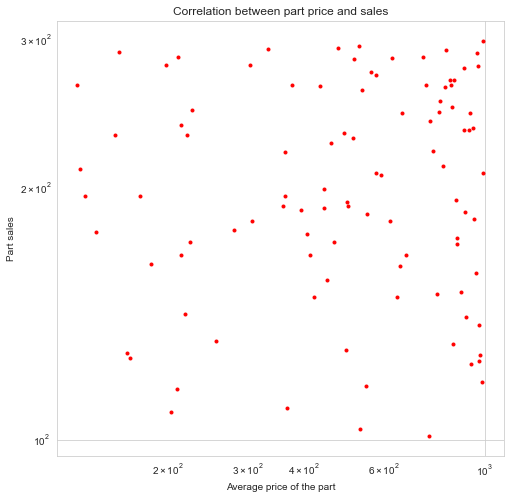

In [59]:
# visualize the correlation
plt.figure(figsize=(8, 8))
plt.plot(part_info_pd['avg_price'], part_info_pd['sales'], '.r')
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Average price of the part")
plt.ylabel("Part sales")
plt.title("Correlation between part price and sales")
plt.show()

`Description`:

There is obviously no correlation between products' average price and sales. It's the reason why we should identify product trends. 

In [60]:
# Correlation between average price and sales trend in the three-year period
# Will a high average price over three years resulted in the declining of sales?

# compute diff
query = """
SELECT a.part as part, a.avg_price as avg_price, b.diff as diff
FROM (
SELECT part, avg(price) as avg_price
FROM transactions
GROUP BY part
) as a,
(
SELECT part, (2018_sales - 2016_sales) as diff 
FROM count_part
) as b
WHERE (a.part=b.part)
ORDER BY diff DESC
"""

part_diff = spark.sql(query)
part_diff.show(5)

+----------+------------------+----+
|      part|         avg_price|diff|
+----------+------------------+----+
| 55289-164| 404.8151669935747|  14|
| 55700-014| 656.5690230389031|  12|
|54868-0823|156.43643835659685|  12|
|54868-6311|  448.670336151123|  11|
| 51523-002| 928.6873358901667|   8|
+----------+------------------+----+
only showing top 5 rows



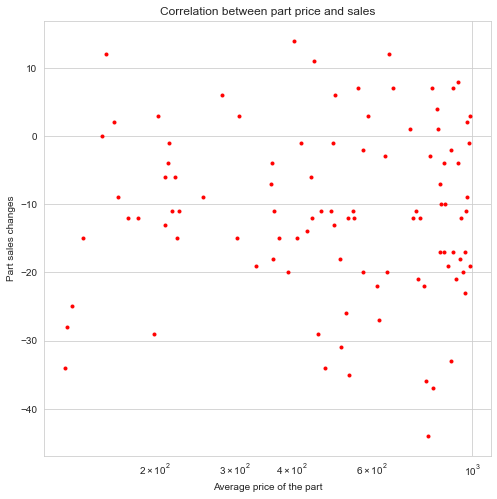

In [61]:
# visualize the correlation
diff = part_diff.toPandas()
plt.figure(figsize=(8, 8))
plt.plot(diff['avg_price'], diff['diff'], '.r')
plt.xscale('log')
plt.xlabel("Average price of the part")
plt.ylabel("Part sales changes")
plt.title("Correlation between part price and sales")
plt.show()

`Description`:

The result shows that a high average price over three years doesn't mean the declinement of sales. The sales were determined by many other factors. Maybe customers are not price sensitive because our parts are necessity for them.  

In [62]:
'''
Explore the price history for parts
'''

# compute average price in each year
query = """
SELECT a.part as part, a.avg_price as avg_2016, b.avg_price as avg_2017, c.avg_price as avg_2018 
FROM (
SELECT part, avg(price) as avg_price
FROM transactions
WHERE year=2016
GROUP BY part
) as a,
(
SELECT part, avg(price) as avg_price
FROM transactions
WHERE year=2017
GROUP BY part
) as b,
(
SELECT part, avg(price) as avg_price
FROM transactions
WHERE year=2018
GROUP BY part
) as c
WHERE (a.part=b.part) and (a.part=c.part)
"""

price_tend = spark.sql(query)
price_tend.show(5)

+---------+------------------+------------------+------------------+
|     part|          avg_2016|          avg_2017|          avg_2018|
+---------+------------------+------------------+------------------+
|98132-889|221.84333989649645| 222.9589306640625|218.55235656738282|
|76314-002| 442.8945213416954| 445.4043627287212| 441.3332021859976|
|52125-444| 283.1969135425709|279.56478452682495|279.49772491455076|
|55700-014| 653.4612851026582| 653.6427497310915| 661.4280376028507|
|49738-105| 494.1786763261004| 487.1022960807704|483.59743574975244|
+---------+------------------+------------------+------------------+
only showing top 5 rows



In [63]:
# compute the increase of average price over the past three years

price_tend.registerTempTable("price_tend")

query = """
SELECT a.part as part, a.diff as price_diff, b.diff as sales_diff
FROM (
SELECT part, (avg_2018 - avg_2016) as diff 
FROM price_tend
ORDER BY diff DESC
) as a,
(
SELECT part, (2018_sales - 2016_sales) as diff 
FROM count_part
) as b
WHERE (a.part=b.part)
ORDER BY price_diff DESC
"""
price_diff = spark.sql(query)
price_diff.show(5)

+----------+------------------+----------+
|      part|        price_diff|sales_diff|
+----------+------------------+----------+
| 51060-032| 99.15339204219345|       -22|
|55154-5057| 92.29214411674491|       -21|
| 35356-325| 78.39727169243753|       -18|
| 10578-049| 67.17683614614464|       -10|
| 49349-820|63.710898473579846|       -12|
+----------+------------------+----------+
only showing top 5 rows



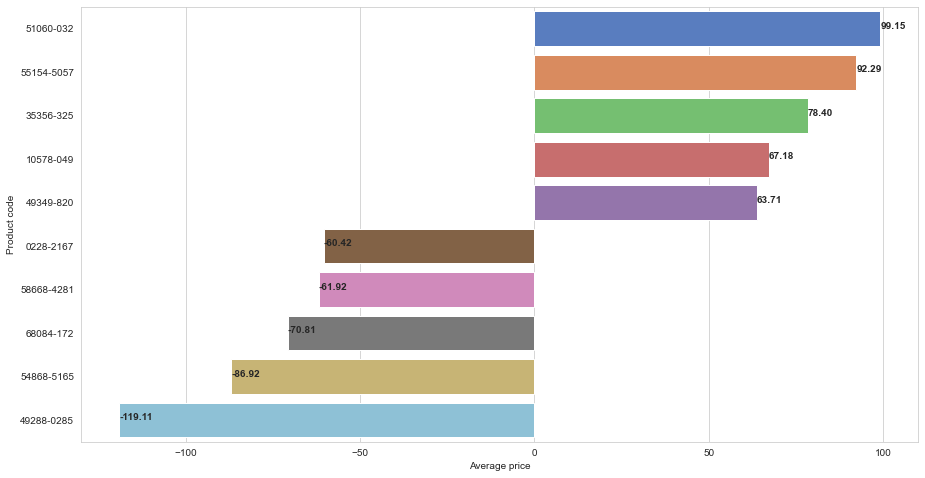

In [64]:
# visualization 

'''
There are 100 parts. To make a more clear visualization, we only showed 10 extreme cases 
'''
# convert to Pandas data frame to draw a chart
price_diff_pd = price_diff.toPandas()

# Horizontal bar chart
sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(15,8))
ax = sns.barplot(x='price_diff', y='part', data=price_diff_pd.head(5).append(price_diff_pd.tail(5)), ci=None, palette="muted",orient='h' )
ax.set_title("", fontsize=15)
ax.set_xlabel ("Average price")
ax.set_ylabel ("Product code")
for rect in ax.patches:
    ax.text (rect.get_width(), rect.get_y() + rect.get_height() / 2,"%.2f"% rect.get_width(), weight='bold' )

plt.show()

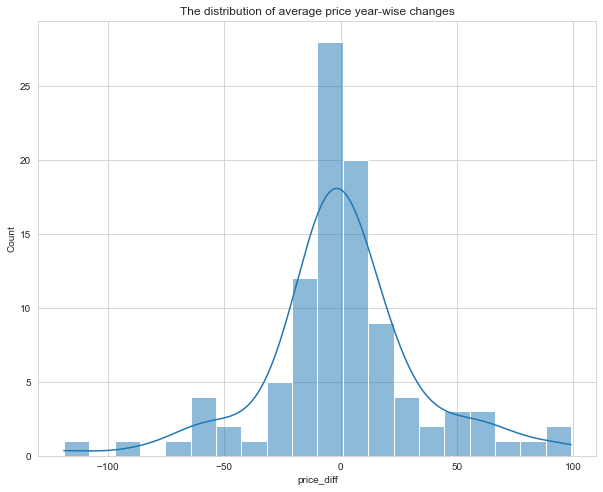

In [65]:
# The distribution of parts average price year-wise changes
plt.figure(figsize=(10, 8))
plt.title('The distribution of average price year-wise changes')
sns.histplot(price_diff_pd['price_diff'], bins=20, kde=True)
plt.show()

`Decription`:

- According to our analysis, 55154-5057 has the biggest increase in price, over 100 Euros, in the past three years. While 54868-5165's price was reduced in a similar degree at the same time. 
- According to the distribution, most parts's price remained nearly unchanged in the past three years. The average price changes approximately obey Gaussian distribution over years.   

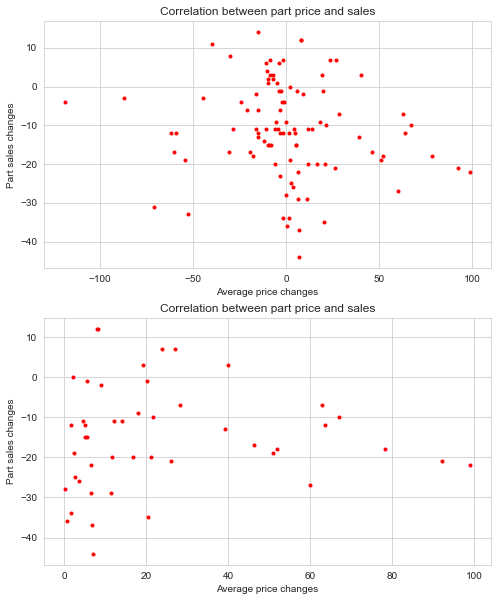

In [66]:
# what about the correlation between sales trend and price trend? 
plt.figure(figsize=(8, 10))
plt.subplot(2,1,1)
plt.plot(price_diff_pd['price_diff'], price_diff_pd['sales_diff'], '.r')
plt.xlabel("Average price changes")
plt.ylabel("Part sales changes")
plt.title("Correlation between part price and sales")


# focus on the parts with increasing price
price_diff.registerTempTable("price_diff")

query = """
SELECT part, price_diff, sales_diff
FROM price_diff
WHERE price_diff>0
"""
price_diff_new = spark.sql(query)
price_diff_new_pd = price_diff_new.toPandas()

plt.subplot(2,1,2)
plt.plot(price_diff_new_pd['price_diff'], price_diff_new_pd['sales_diff'], '.r')
plt.xlabel("Average price changes")
plt.ylabel("Part sales changes")
plt.title("Correlation between part price and sales")
plt.show()

`Description`:

This figure is not clear. For those parts with a stable price, their sales may be affected by factors other than price.  

But let's look at those parts with an increasing price in the past years. Excluding some special cases, there is an approximately negative correlation between parts'sales and price. But it's not very strong. We may need more data to build a model for each product, to make a trade-off between sales and price, to maximize profits.  

In [67]:
'''
What about the trend over quarters?
'''

# revise the function we defined before
def investYear(year, part):
    query = """
    SELECT quarter, avg(price) as sales
    FROM transactions
    WHERE (year={}) and (part='{}')
    GROUP BY quarter
    ORDER BY quarter
    """.format(year, part)
    tmp = spark.sql(query)
    return tmp

def investPart(part):
    # quarter sales in each year for a part 
    tmp_16 = investYear(2016, part)
    tmp_17 = investYear(2017, part)
    tmp_18 = investYear(2018, part)
    tmp_16.registerTempTable("tmp_16")
    tmp_17.registerTempTable("tmp_17")
    tmp_18.registerTempTable("tmp_18")
    
    query = """
    SELECT * 
    FROM tmp_16 UNION ALL 
    SELECT * 
    FROM tmp_17 UNION ALL
    SELECT *
    from tmp_18 
    """
    tmp = spark.sql(query)
    return tmp

In [8]:
'''
This cell can be very time-costing.
'''
part_name = count_part.toPandas()['part'].values
price_trend = {}
for i in range(len(part_name)):
    tmp = investPart(part_name[i])
    tmp = tmp.toPandas()
    price_trend[part_name[i]] = tmp.sales.values

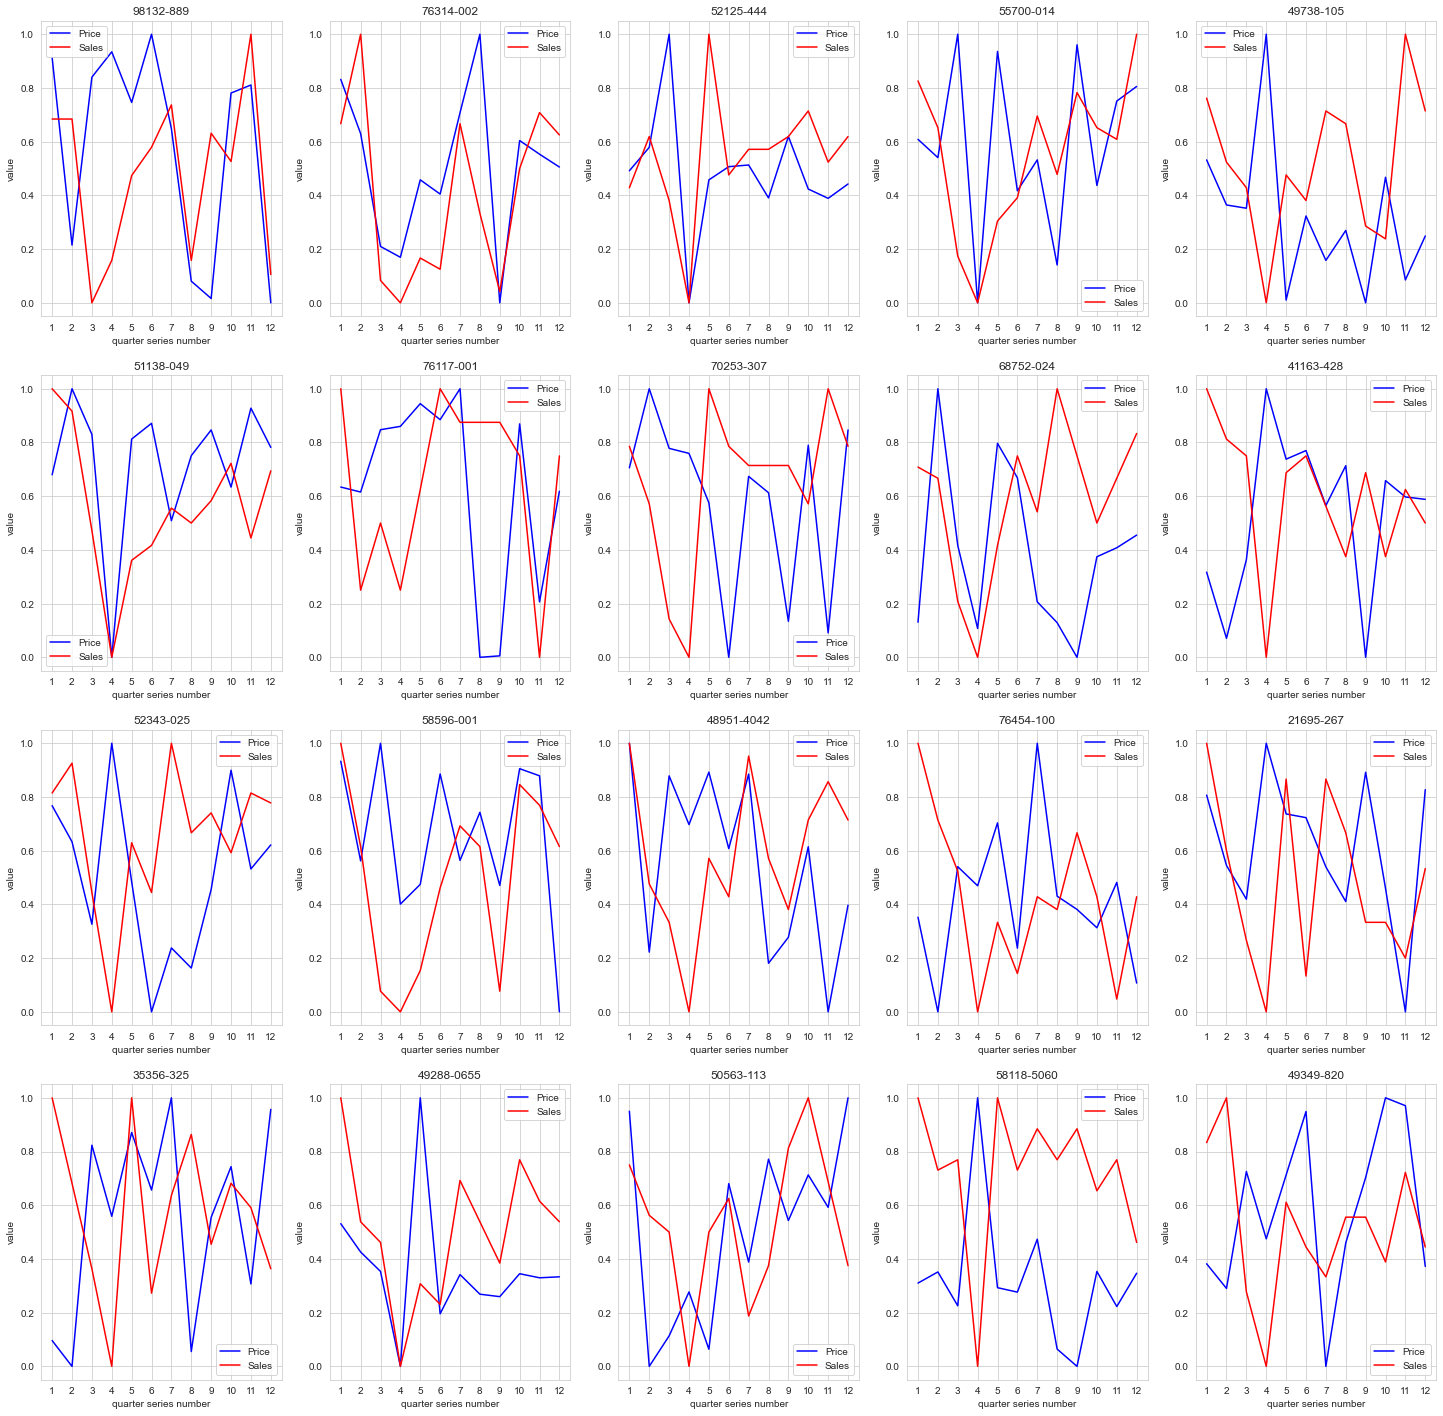

In [70]:
'''
NB: To compare the sales trend and average price history, I normalized the two trends. 
'''
# Visulization
# There are too many (100) parts, I plan to show them in 20s
# 1 - 20
plt.figure(figsize=(25, 25))
for i in range(20):
    plt.subplot(4, 5, i+1)
    name = part_name[i]
    price = price_trend[name]
    sales = sales_trend[name]
    price = (price - np.min(price))/(np.max(price) - np.min(price))
    sales = (sales - np.min(sales))/(np.max(sales) - np.min(sales))
    plt.plot(range(1, len(price)+1), price, 'b')
    plt.plot(range(1, len(sales)+1), sales, 'r')
    plt.legend(['Price', 'Sales'])
    plt.title(name)
    plt.xlabel('quarter series number')
    plt.ylabel('value')
    plt.xticks(range(1, 13))
plt.show()

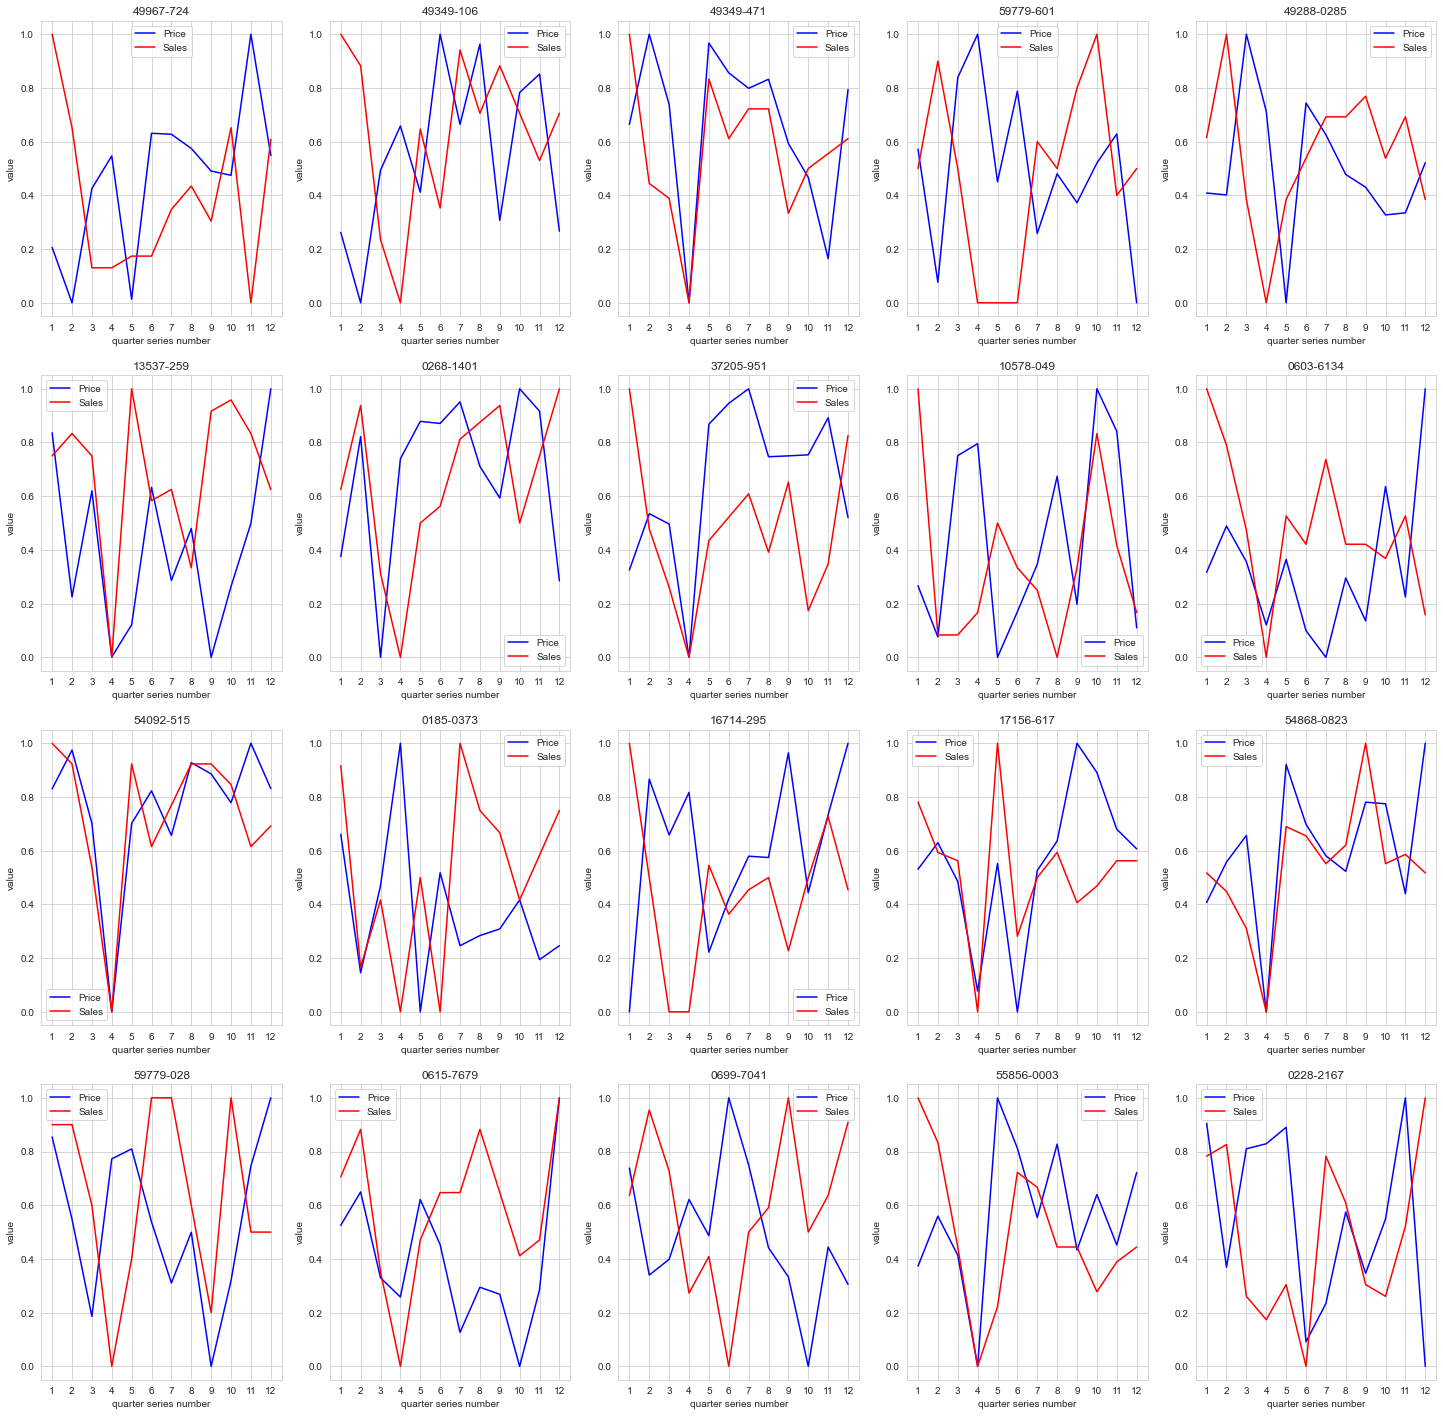

In [71]:
# 21 - 40
plt.figure(figsize=(25, 25))
for i in range(20):
    plt.subplot(4, 5, i+1)
    name = part_name[i+20]
    price = price_trend[name]
    sales = sales_trend[name]
    price = (price - np.min(price))/(np.max(price) - np.min(price))
    sales = (sales - np.min(sales))/(np.max(sales) - np.min(sales))
    plt.plot(range(1, len(price)+1), price, 'b')
    plt.plot(range(1, len(sales)+1), sales, 'r')
    plt.legend(['Price', 'Sales'])
    plt.title(name)
    plt.xlabel('quarter series number')
    plt.ylabel('value')
    plt.xticks(range(1, 13))
plt.show()

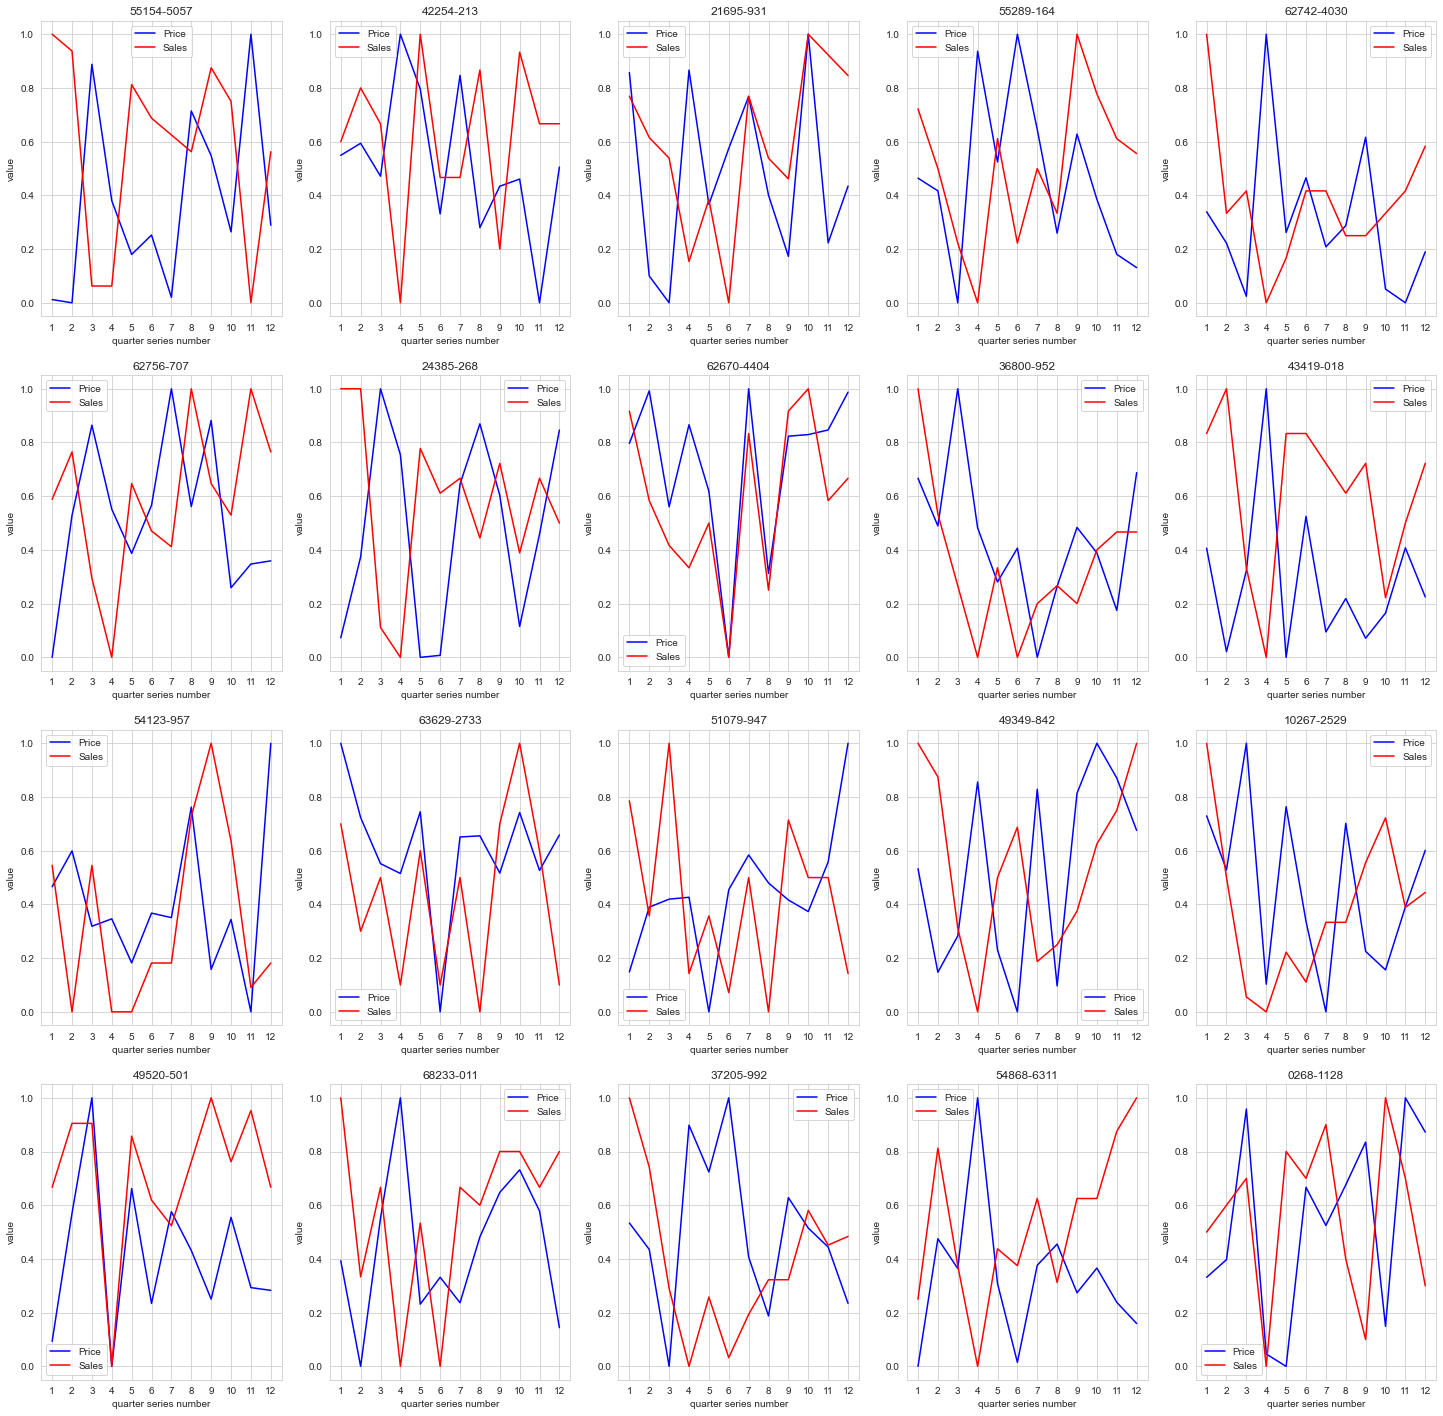

In [72]:
# 41 - 60
plt.figure(figsize=(25, 25))
for i in range(20):
    plt.subplot(4, 5, i+1)
    name = part_name[i+40]
    price = price_trend[name]
    sales = sales_trend[name]
    price = (price - np.min(price))/(np.max(price) - np.min(price))
    sales = (sales - np.min(sales))/(np.max(sales) - np.min(sales))
    plt.plot(range(1, len(price)+1), price, 'b')
    plt.plot(range(1, len(sales)+1), sales, 'r')
    plt.legend(['Price', 'Sales'])
    plt.title(name)
    plt.xlabel('quarter series number')
    plt.ylabel('value')
    plt.xticks(range(1, 13))
plt.show()

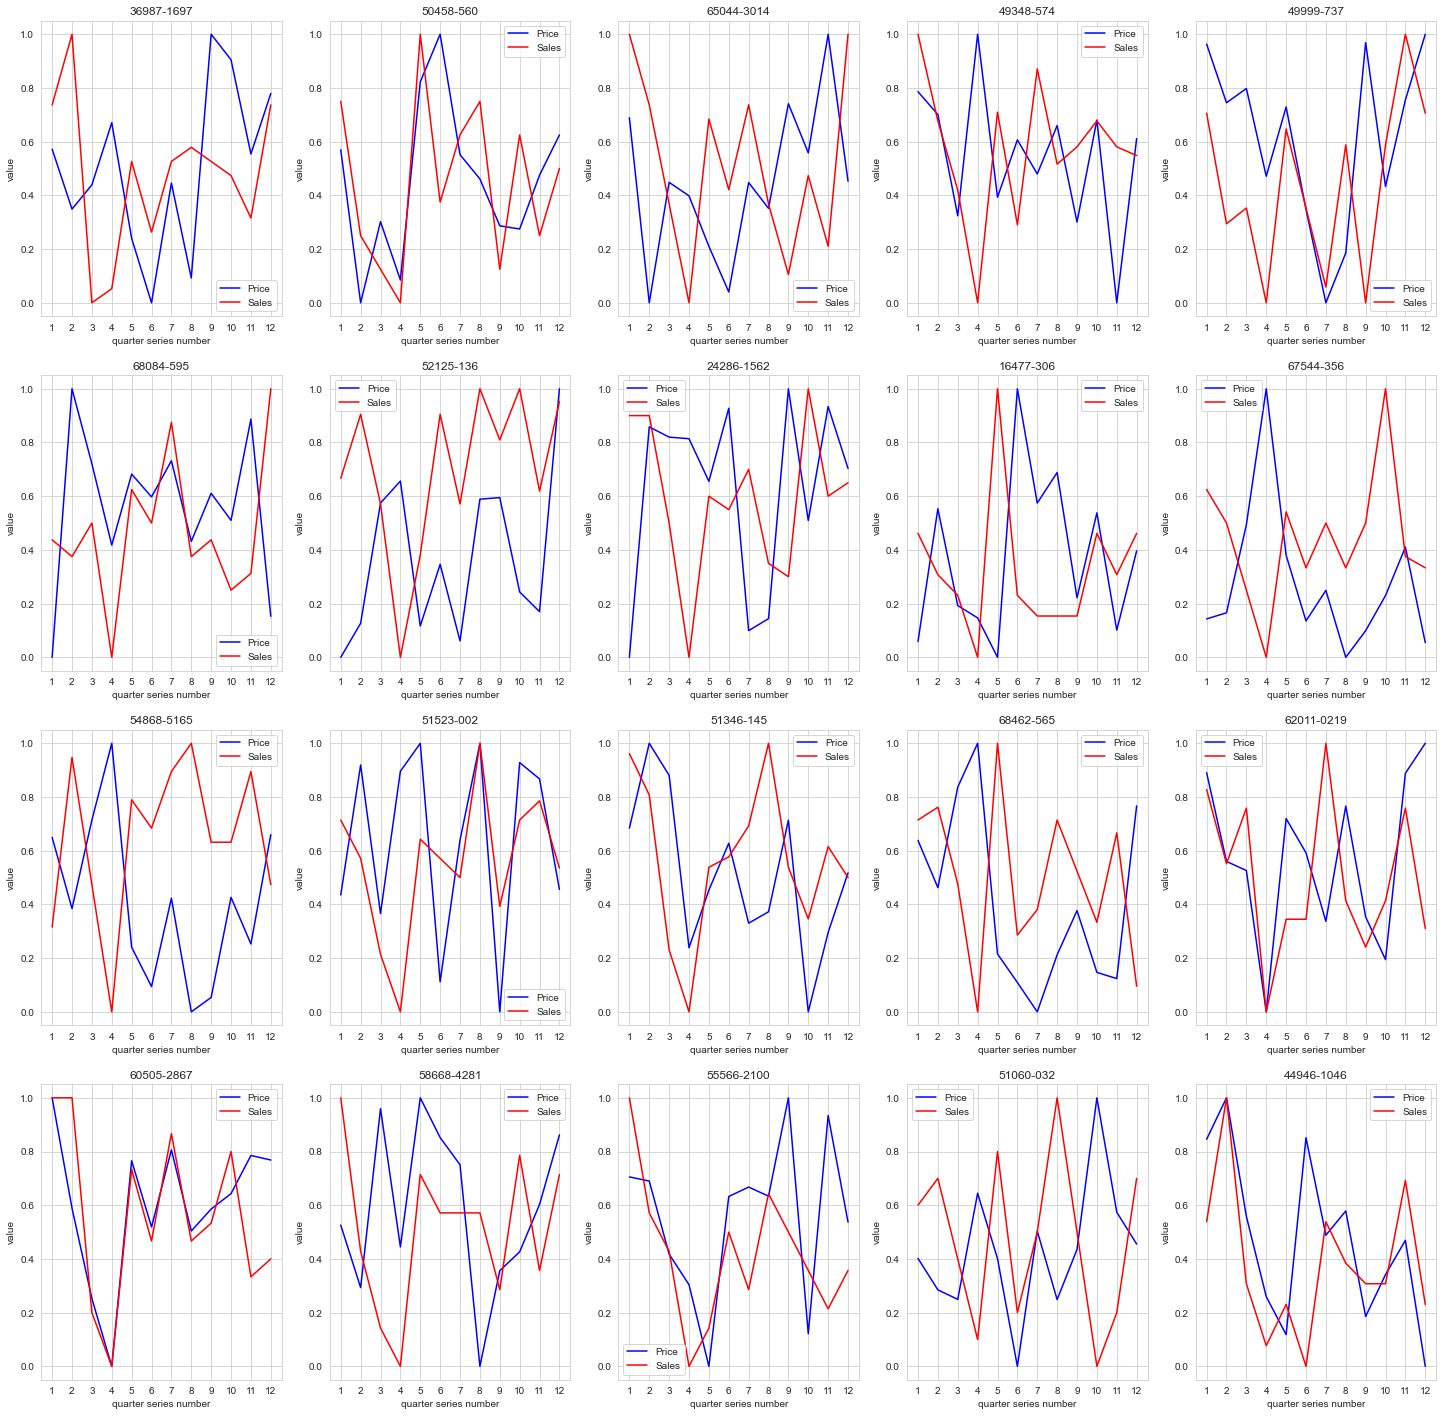

In [73]:
# 61 - 80
plt.figure(figsize=(25, 25))
for i in range(20):
    plt.subplot(4, 5, i+1)
    name = part_name[i+60]
    price = price_trend[name]
    sales = sales_trend[name]
    price = (price - np.min(price))/(np.max(price) - np.min(price))
    sales = (sales - np.min(sales))/(np.max(sales) - np.min(sales))
    plt.plot(range(1, len(price)+1), price, 'b')
    plt.plot(range(1, len(sales)+1), sales, 'r')
    plt.legend(['Price', 'Sales'])
    plt.title(name)
    plt.xlabel('quarter series number')
    plt.ylabel('value')
    plt.xticks(range(1, 13))
plt.show()

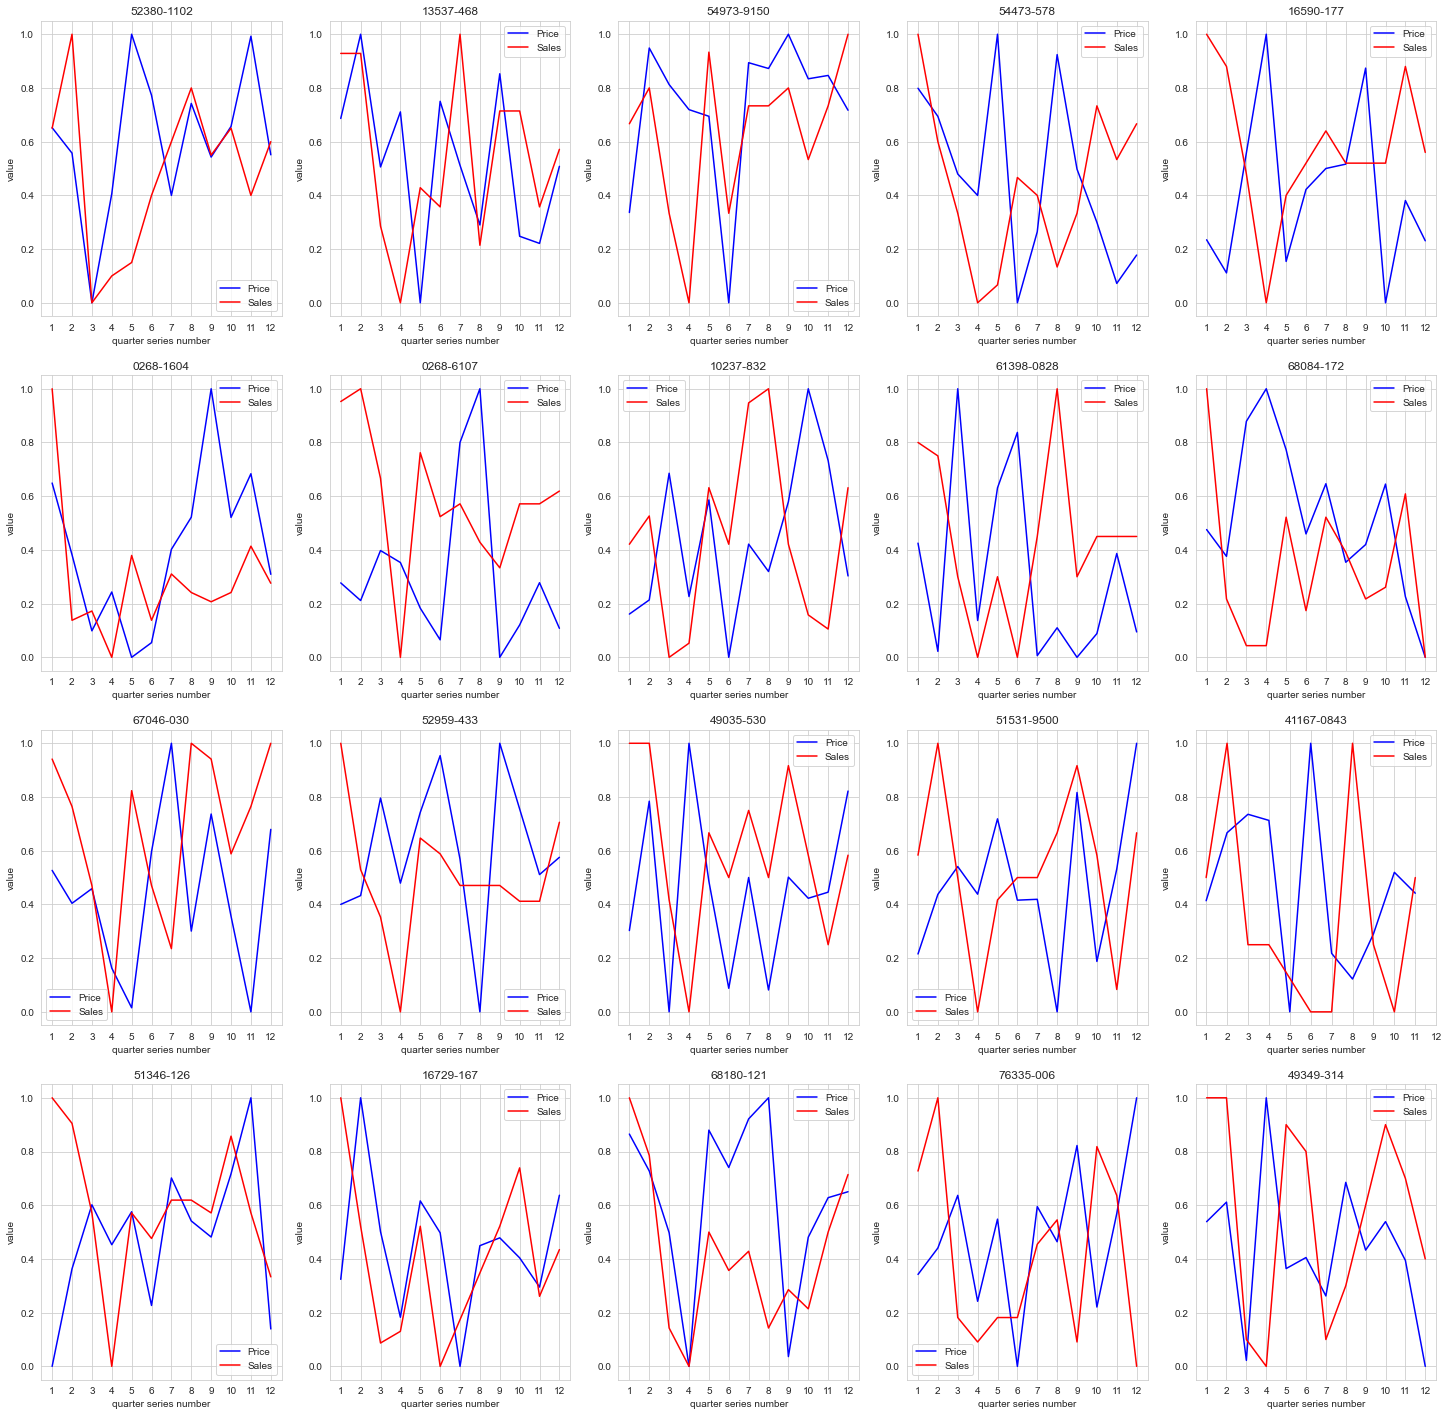

In [74]:
# 81 - 100
plt.figure(figsize=(25, 25))
for i in range(20):
    plt.subplot(4, 5, i+1)
    name = part_name[i+80]
    price = price_trend[name]
    sales = sales_trend[name]
    price = (price - np.min(price))/(np.max(price) - np.min(price))
    sales = (sales - np.min(sales))/(np.max(sales) - np.min(sales))
    plt.plot(range(1, len(price)+1), price, 'b')
    plt.plot(range(1, len(sales)+1), sales, 'r')
    plt.legend(['Price', 'Sales'])
    plt.title(name)
    plt.xlabel('quarter series number')
    plt.ylabel('value')
    plt.xticks(range(1, 13))
plt.show()

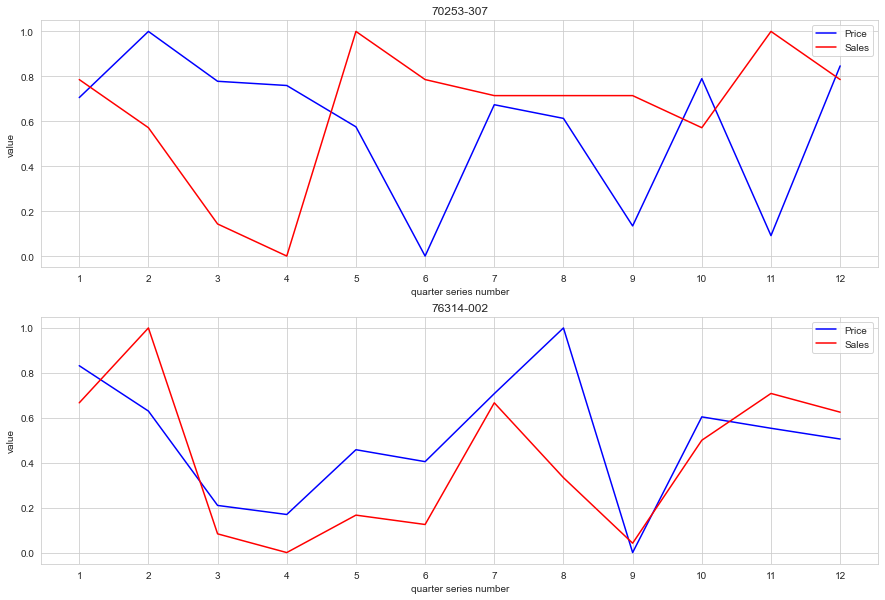

In [75]:
'''
Until here, I guess there are too many figures for the boss. Let's look at some typical graphs!
'''
plt.figure(figsize=(15, 10))
namelist=['70253-307', '76314-002']
for i in range(len(namelist)):
    plt.subplot(len(namelist), 1, i+1)
    name = namelist[i]
    price = price_trend[name]
    sales = sales_trend[name]
    price = (price - np.min(price))/(np.max(price) - np.min(price))
    sales = (sales - np.min(sales))/(np.max(sales) - np.min(sales))
    plt.plot(range(1, len(price)+1), price, 'b')
    plt.plot(range(1, len(sales)+1), sales, 'r')
    plt.legend(['Price', 'Sales'])
    plt.title(name)
    plt.xlabel('quarter series number')
    plt.ylabel('value')
    plt.xticks(range(1, 13))
plt.show()

`Description`:

We can draw two conclusions from figures above. 

- First, for part 70253-307, it's clear that when our company reduced the price, the part's sales experienced an increasing tendency. Vice Versa.
- Another finding we have is about part 76314-002. During quarter 6 and 7, even though our company increased the price, the sales were still increasing. But soon after quarter 7, the sales declined. It means that the increase in price doesn't result in an instant response in sales: we are able to maximize our profits if applying a reasonable price strategy.   

### Are there any clients for which profit is declining? (12.5 pts)

Declining profit from a specific client may indicate that the client is dissatisfied with the product. Gaining a new client is often much more work than retaining one. Early warnings about declining profit may help your boss fighting customer churn. Answer the following questions and provide appropriate visualisations for each of them. As mentioned before, include headers, legends and well-written descriptions for graphs/charts.


#### 2.5. Compute and visualise the trend in total purchases for all customers, per yearly quarter. (5 pts)


You should also add a paragraph describing your findings.

In [76]:
'''
Let's first see the trends for each customers. Revise the functions we wrote before
'''

# reregister df with null parts
df.registerTempTable("transactions")

# revise the function we defined before
def investYear(year, part):
    query = """
    SELECT quarter, count(price) as sales
    FROM transactions
    WHERE (year={}) and (company='{}')
    GROUP BY quarter
    ORDER BY quarter
    """.format(year, part)
    tmp = spark.sql(query)
    return tmp

def investPart(part):
    # quarter sales in each year for a part 
    tmp_16 = investYear(2016, part)
    tmp_17 = investYear(2017, part)
    tmp_18 = investYear(2018, part)
    tmp_16.registerTempTable("tmp_16")
    tmp_17.registerTempTable("tmp_17")
    tmp_18.registerTempTable("tmp_18")
    
    query = """
    SELECT * 
    FROM tmp_16 UNION ALL 
    SELECT * 
    FROM tmp_17 UNION ALL
    SELECT *
    from tmp_18 
    """
    tmp = spark.sql(query)
    return tmp

In [78]:
# fetch company namelist
company = df.groupBy('company').agg(f.count('company').alias("Number of transactions")).toPandas().company.values

In [ ]:
'''
NB: This can be time-costing
'''
company_trend = {}
for i in range(len(company)):
    tmp = investPart(company[i])
    tmp = tmp.toPandas()
    company_trend[company[i]] = tmp.sales.values

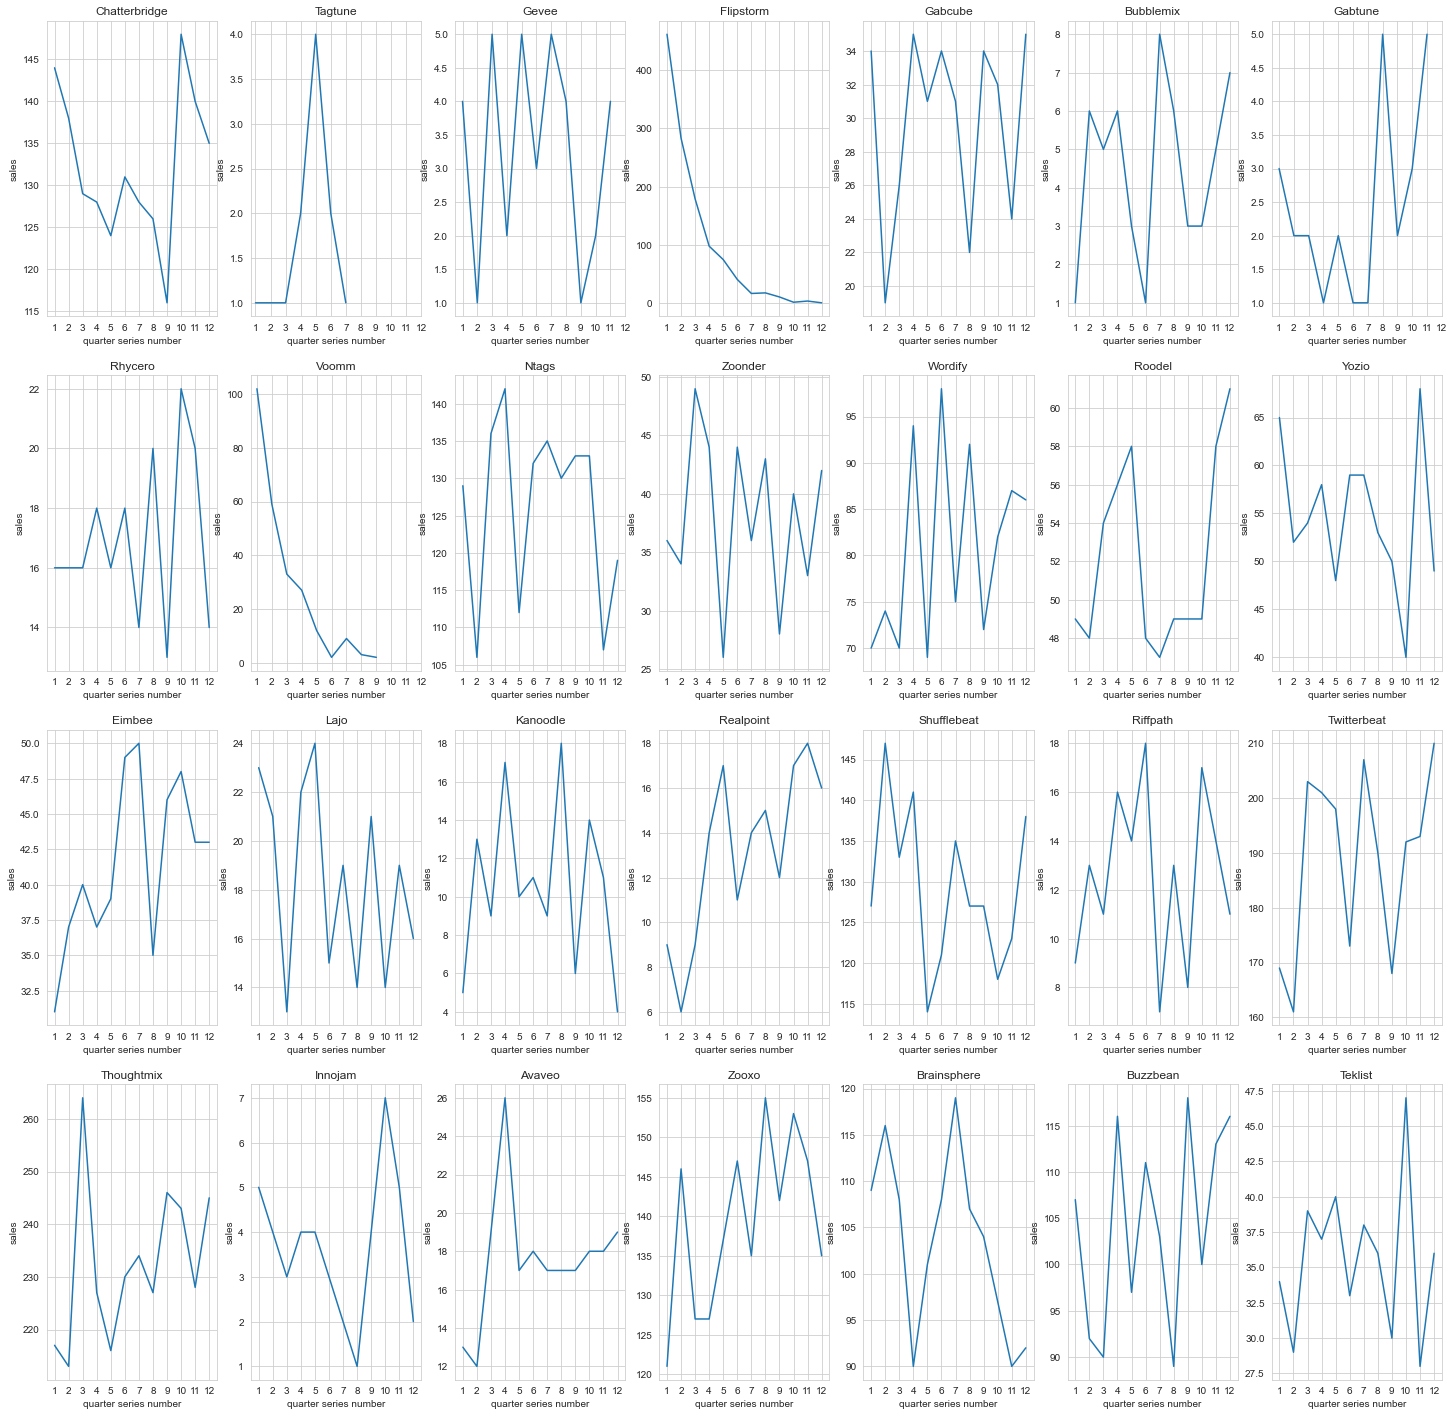

In [81]:
plt.figure(figsize=(25, 25))
for i in range(28):
    plt.subplot(4, 7, i+1)
    name = company[i]
    sales = company_trend[name]
    plt.plot(range(1, len(sales)+1), sales)
    plt.title(name)
    plt.xlabel('quarter series number')
    plt.ylabel('sales')
    plt.xticks(range(1, 13))
plt.show()

 `Description`:
 
 From the figures above we can learn that our company is losing Flipstorm and Voomm these three years. We need to take actions to retain them. Our company has been experiencing a better relationship with Thoughtmix since 2017, and Roodel since 2018. There is possibility that Brainsphere and Innojam will terminate cooperation with us, since their purchases number decreased sharply lately. 

In [82]:
'''
Then what about the trends for all the customers?
'''
# revise the function we defined before
def investYear(year):
    query = """
    SELECT quarter, count(price) as sales
    FROM transactions
    WHERE (year={})
    GROUP BY quarter
    ORDER BY quarter
    """.format(year)
    tmp = spark.sql(query)
    return tmp

tmp_16 = investYear(2016)
tmp_17 = investYear(2017)
tmp_18 = investYear(2018)
tmp_16.registerTempTable("tmp_16")
tmp_17.registerTempTable("tmp_17")
tmp_18.registerTempTable("tmp_18")
    
query = """
SELECT * 
FROM tmp_16 UNION ALL 
SELECT * 
FROM tmp_17 UNION ALL
SELECT *
from tmp_18 
"""
trend = spark.sql(query)
trend.show()

+-------+-----+
|quarter|sales|
+-------+-----+
|      1| 2094|
|      2| 1848|
|      3| 1826|
|      4| 1784|
|      1| 1608|
|      2| 1659|
|      3| 1652|
|      4| 1614|
|      1| 1573|
|      2| 1639|
|      3| 1603|
|      4| 1642|
+-------+-----+



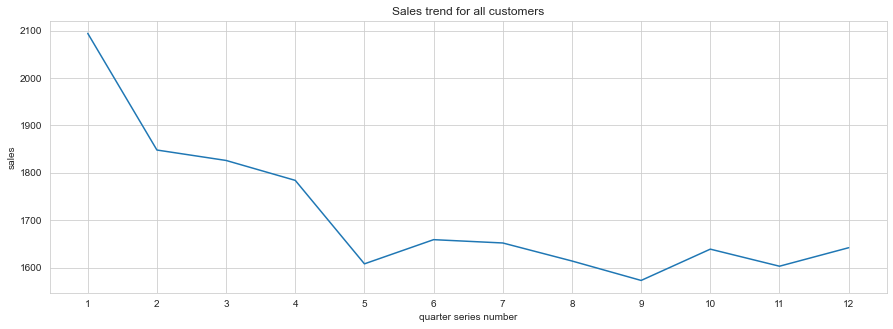

In [83]:
plt.figure(figsize=(15, 5))
sales = trend.toPandas().sales.values
plt.plot(range(1, len(sales)+1), sales)
plt.title('Sales trend for all customers')
plt.xlabel('quarter series number')
plt.ylabel('sales')
plt.xticks(range(1, 13))
plt.show()

`Description`:

Proofs show that our company's situation is not well. Our quarterly purchases have been continuously decreased considerably for the past three years. Things became a little better this year, but not much. We guess the reason is that we are losing one of our biggest customers Thoughtmix gradually (I explained in the last question). It's a dangerous signal. The head of the company should pay attention to it.  

#### 2.6 Find profit-per-customer trends. (7.5 pts)

Find the customers for which profit declined in 2018, relative to 2016. By how much has profit declined? What are the three customers for which profit is declining the most?

Compute the answer, plot appropriately, and write a paragraph describing the findings.


In [84]:
# profits of companys over the past three years
query = """
SELECT a.company as company, a.profit as 2016_profit, b.profit as 2017_profit, c.profit as 2018_profit
FROM (
SELECT company, sum(price) as profit
FROM transactions
WHERE year=2016
GROUP BY company
) as a,
(
SELECT company, sum(price) as profit
FROM transactions
WHERE year=2017
GROUP BY company
) as b,
(
SELECT company, sum(price) as profit
FROM transactions
WHERE year=2018
GROUP BY company
) as c
WHERE (a.company=b.company) and (a.company=c.company)
"""
company_profit = spark.sql(query)
company_profit.show(28)

+-------------+------------------+------------------+------------------+
|      company|       2016_profit|       2017_profit|       2018_profit|
+-------------+------------------+------------------+------------------+
|Chatterbridge|  310822.149892807| 297957.3199913502|312331.43003845215|
|      Tagtune| 569.8899993896484|2011.7200317382812| 3998.030044555664|
|        Gevee| 6573.240036010742|10141.350006103516| 5834.569984436035|
|    Flipstorm| 578467.2100734711| 83209.28002166748| 10379.08003616333|
|      Gabcube| 64408.58979034424|  70402.9600982666| 69866.71029853821|
|    Bubblemix| 9388.306190490723| 8723.223218917847| 9465.263076782227|
|      Gabtune| 4373.250030517578| 4258.169952392578| 9727.850021362305|
|      Rhycero| 37147.99001312256|38060.250186920166| 37566.48003387451|
|        Voomm|127722.31015777588| 15359.94985961914| 1717.719970703125|
|        Ntags|   289311.82006073| 284681.4297733307|272259.30005836487|
|      Zoonder| 94029.21371078491| 81054.2962303161

In [85]:
# find out those whose prifit was declining over the past years

company_profit.registerTempTable("company_profit")

query = """
SELECT company, (2018_profit - 2016_profit) as diff 
FROM company_profit
WHERE (2018_profit - 2016_profit)  < 0
ORDER BY diff
"""

keep_dec_company = spark.sql(query)
keep_dec_company.show()

+-----------+-------------------+
|    company|               diff|
+-----------+-------------------+
|  Flipstorm| -568088.1300373077|
|      Voomm|-126004.59018707275|
|Shufflebeat|-24567.240045547485|
|      Yozio| -24319.23947906494|
|Brainsphere| -22200.87977218628|
|    Zoonder|-17782.959995269775|
|      Ntags|-17052.520002365112|
|   Kanoodle| -7219.597702026367|
|       Lajo| -4915.499988555908|
|      Gevee|  -738.670051574707|
+-----------+-------------------+



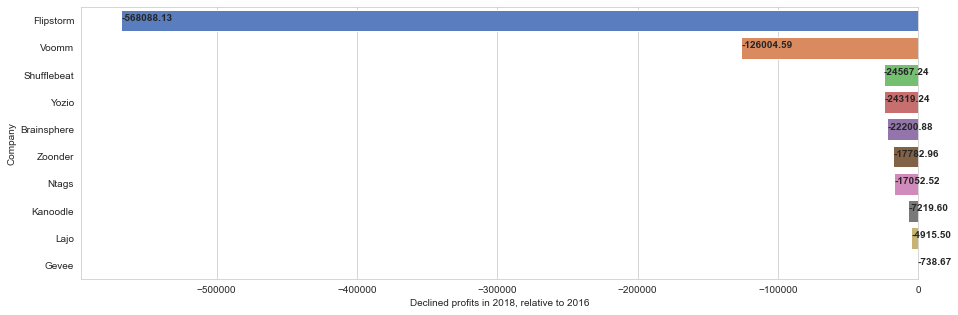

In [86]:
# Visualization

# convert to Pandas data frame to draw a chart
keep_dec_company_pd = keep_dec_company.toPandas()

# Horizontal bar chart
sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(15,5))
ax = sns.barplot(x='diff', y='company', data=keep_dec_company_pd, ci=None, palette="muted",orient='h' )
ax.set_title("", fontsize=15)
ax.set_xlabel ("Declined profits in 2018, relative to 2016")
ax.set_ylabel ("Company")
for rect in ax.patches:
    ax.text (rect.get_width(), rect.get_y() + rect.get_height() / 2,"%.2f"% rect.get_width(), weight='bold' )

plt.show()

`Description`:

Our analysis shows that the three customers whose profits were declining fastest are Flipstorm, Voomm and Shufflebeat. Among them, Flipstorm had a decrease in profits for more than 560000 Euros. It's a bad signal meaning that our company is losing this partner. The company may need to take actions to rettain it as soon as possible.  

## Part 3: Your own insights (10 pts)

Time to explore the data freely to create two valuable, actionable insights. This is your chance to show your ability to do fully self-directed data analysis. 

Your insights should be non-trivial. A trivial finding would be, e.g., "the number of currencies in which we record transations is $n$". That's not a particularly groundbreaking insight. Dig a bit deeper!

#### 3.1. Add your own query #1 (5 pts)

Impress your boss providing a valuable data-driven insight. Why is this relevant? Describe the query in words and provide appropriate visualisations. Write a paragraph describing your findings.

In [87]:
'''
In part 2, we noticed that our company is experiencing declinement in sales. To look more into the company's situation at present, 
we plan to find out the trend of company's income quarterly. 
'''
## first is the profits

# revise the function we defined before
def investYear(year):
    query = """
    SELECT quarter, sum(price) as sales
    FROM transactions
    WHERE (year={})
    GROUP BY quarter
    ORDER BY quarter
    """.format(year)
    tmp = spark.sql(query)
    return tmp

tmp_16 = investYear(2016)
tmp_17 = investYear(2017)
tmp_18 = investYear(2018)
tmp_16.registerTempTable("tmp_16")
tmp_17.registerTempTable("tmp_17")
tmp_18.registerTempTable("tmp_18")
    
query = """
SELECT * 
FROM tmp_16 UNION ALL 
SELECT * 
FROM tmp_17 UNION ALL
SELECT *
from tmp_18 
"""
trend = spark.sql(query)
trend.show()

+-------+------------------+
|quarter|             sales|
+-------+------------------+
|      1|1172055.0883903503|
|      2|1051591.7113409042|
|      3| 1054666.393933773|
|      4|1044943.0889148712|
|      1| 933761.5216124058|
|      2|  949761.856423378|
|      3| 953505.2305893898|
|      4| 937858.2722209692|
|      1| 885485.9211194515|
|      2| 931666.1664693952|
|      3| 926678.8583545685|
|      4| 949587.7502002716|
+-------+------------------+



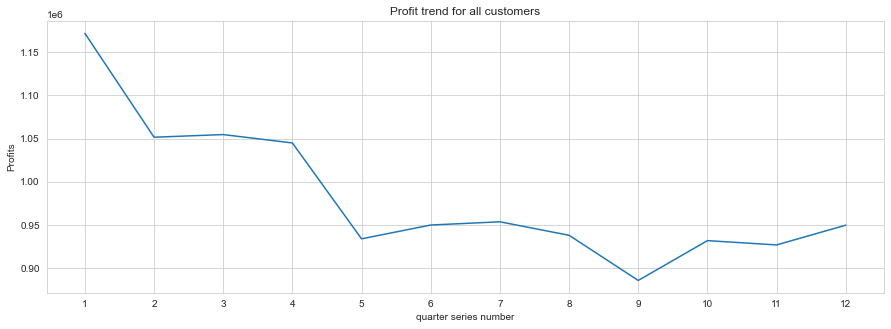

In [88]:
plt.figure(figsize=(15, 5))
sales = trend.toPandas().sales.values
plt.plot(range(1, len(sales)+1), sales)
plt.title('Profit trend for all customers')
plt.xlabel('quarter series number')
plt.ylabel('Profits')
plt.xticks(range(1, 13))
plt.show()

`Description`:

 The profit has a similar trend with sales. It kept decreasing during 2016 and 2017, and became slightly better in 2018. What bad news to our company!  

In [89]:
# Let's explore the reason behind the trend. What is our pricing strategy these years? 

def investYear(year):
    query = """
    SELECT quarter, avg(price) as sales
    FROM transactions
    WHERE (year={})
    GROUP BY quarter
    ORDER BY quarter
    """.format(year)
    tmp = spark.sql(query)
    return tmp

tmp_16 = investYear(2016)
tmp_17 = investYear(2017)
tmp_18 = investYear(2018)
tmp_16.registerTempTable("tmp_16")
tmp_17.registerTempTable("tmp_17")
tmp_18.registerTempTable("tmp_18")
    
query = """
SELECT * 
FROM tmp_16 UNION ALL 
SELECT * 
FROM tmp_17 UNION ALL
SELECT *
from tmp_18 
"""
trend_a = spark.sql(query)
trend_a.show()

+-------+-----------------+
|quarter|            sales|
+-------+-----------------+
|      1|559.7206725837394|
|      2|569.0431338424806|
|      3|577.5829101499305|
|      4|585.7304310060937|
|      1| 580.697463689307|
|      2|572.4905704782267|
|      3|577.1823429717856|
|      4|581.0769964194357|
|      1|562.9281125997785|
|      2|568.4357330502716|
|      3|578.0903670334177|
|      4|578.3116627285455|
+-------+-----------------+



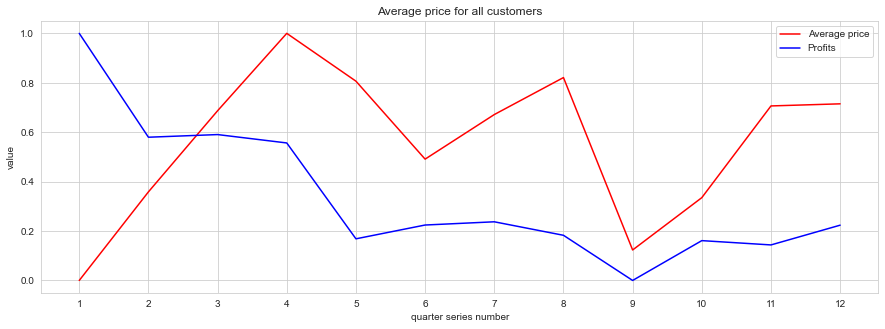

In [90]:
# to make the figure more clear, I normalize the trends
plt.figure(figsize=(15, 5))
profits = trend.toPandas().sales.values
avg_price = trend_a.toPandas().sales.values
profits = (profits - np.min(profits)) / (np.max(profits) - np.min(profits))
avg_price = (avg_price - np.min(avg_price)) / (np.max(avg_price) - np.min(avg_price))
plt.plot(range(1, len(avg_price)+1), avg_price, 'r')
plt.plot(range(1, len(profits)+1), profits, 'b')
plt.title('Average price for all customers')
plt.legend(['Average price', 'Profits'])
plt.xlabel('quarter series number')
plt.ylabel('value')
plt.xticks(range(1, 13))
plt.show()

`Description`:

There is not direct correlation with our price strategy and profits. But one thing we can make for sure is that the average price of our products have increased these years. It may be a cause for our current situation. 

#### 3.2. Add your own query #2 (5 pts)

Impress your boss providing a valuable data-driven insight. Why is this relevant? Describe the query in words and provide appropriate visualisations. Write a paragraph describing your findings.

In [91]:
'''
Until now, we haven't used "country" and "city" attributes. We mentioned before that our main partners are all inside Europe. 
Exploiting oversea markets may be a key to get rid of the poor sales situation. In this part, we'd look into our market proportion 
for different countries.   
'''
# retrieve data via SQL queries
df.registerTempTable("transactions")

query = """
SELECT country, sum(price) as revenue
FROM transactions
GROUP BY country
ORDER BY revenue DESC
"""
revenue = spark.sql(query)
revenue.show(40)

+--------------+------------------+
|       country|           revenue|
+--------------+------------------+
|      Portugal| 4768130.737861514|
|        France|2717149.1591198444|
|United Kingdom| 952292.5544662476|
|         Spain| 921110.8999226093|
| United States| 761835.7485311627|
|       Germany| 714188.0997695923|
|        Greece|  583436.950378418|
|   Netherlands| 266893.9103240967|
|         Japan| 99944.15912055969|
|   Switzerland| 6579.640075683594|
+--------------+------------------+



In [92]:
# to Pandas dataframe
revenue_pd = revenue.toPandas()

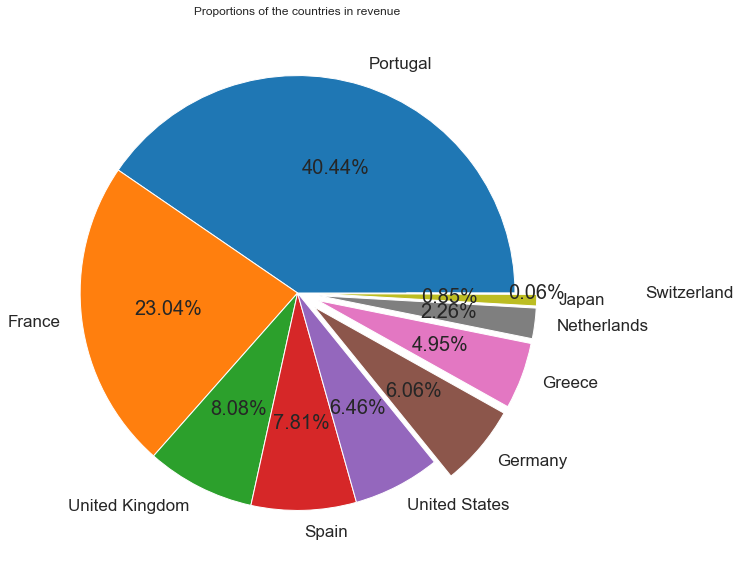

In [93]:
# Visualization
plt.figure(figsize=(10, 10))
patches, l_text, p_text = plt.pie(revenue_pd.revenue, explode=[0, 0, 0, 0, 0, 0.1, 0.1, 0.1, 0.1, 0.5], labels=revenue_pd.country, autopct = '%.2f%%')
for t in l_text:
    t.set_size(17)
for t in p_text:
    t.set_size(20)
plt.title("Proportions of the countries in revenue")    
plt.show()

`Description`:

Portugal and France is our largest market and U.S. is our biggest oversea partner. 98.64% of our revenues in last three years were from European companies. Therefore, our company may find more partners outside Europe, to expand the market. 